In [1]:
import mesa
import math
import numpy as np
from model import Evacuation
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm

c:\Users\User1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set_theme(style = "whitegrid", palette = "Pastel1")

In [3]:
#Evacuation(n=10, width=20, height=10, door_width = 4, seed=10, model_type = "BNE_mixed_SR", p_BNE = 100)

def batch_run(params):

    if __name__ == '__main__':
        results = mesa.batch_run(
            Evacuation,
            parameters=params,
            iterations=50,
            max_steps=500,
            number_processes=8,
            data_collection_period=-1,
            display_progress=1
        )

    results_df = pd.DataFrame(results)
    ev_times = results_df.groupby("RunId").first().Step
    return ev_times

### Czas ewakuacji dla ustalonego otoczenia i liczby pieszych w zależności od algorytmu

#### box ploty

In [4]:
results_box_bne = batch_run({"n": 1000 , "width": 68, "height": 20, "door_width": 6, "seed": None, "model_type": "BNE_mixed_SR", "p_BNE": 100})

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [01:59<00:00,  2.40s/it]


In [ ]:
results_box_rf = batch_run({"n": 1000 , "width": 68, "height": 20, "door_width": 6, "seed": None, "model_type": "BNE_mixed_RF", "p_BNE": 0})

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
results_box_sr = batch_run({"n": 1000 , "width": 68, "height": 20, "door_width": 6, "seed": None, "model_type": "BNE_mixed_SR", "p_BNE": 0})

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
box_df = pd.DataFrame(
    {   "model_type": np.concatenate((np.full(50, "BNE"), np.full(50, "RF"), np.full(50, "SR"))),
        "exit_time": np.concatenate((results_box_bne.values, results_box_rf.values, results_box_sr.values))
    })
box_df

,model_type,exit_time
0,BNE,106
1,BNE,108
2,BNE,500
3,BNE,109
4,BNE,110
...,...,...
145,SR,204
146,SR,236
147,SR,218
148,SR,226


<Axes: title={'center': 'exit_time'}, xlabel='model_type'>

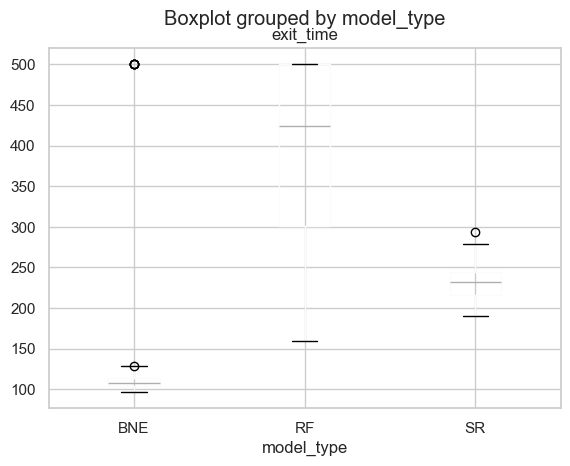

In [ ]:
box_df.boxplot("exit_time", "model_type")

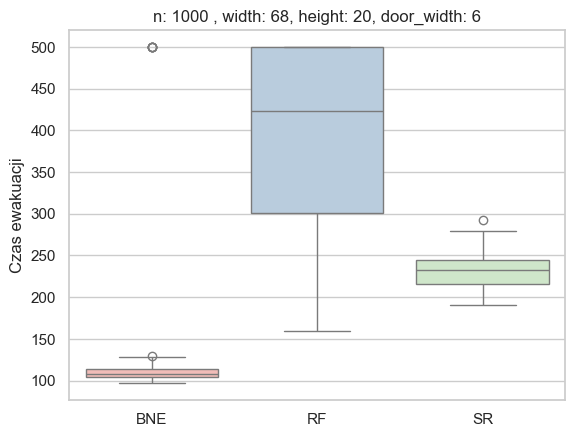

In [ ]:
sns.boxplot( np.array([results_box_bne, results_box_rf, results_box_sr]).T)
plt.xticks(np.arange(3), ["BNE", "RF", "SR"])
plt.title("n: 1000 , width: 68, height: 20, door_width: 6")
plt.ylabel("Czas ewakuacji")
plt.show()

#### Przykładowe klatki z różnych metod

In [ ]:
def frames(method):
    model_type = method[0]
    p_bne = method[1]

    frames_nums = [0, 20, 40, 60, 80, 100 ]
    model = Evacuation(n = 1000, width = 68, height = 20, door_width = 6, seed = 10, model_type=model_type, p_BNE = p_bne)
    agent_counts = np.zeros((model.grid.width, model.grid.height))
    step_num=0
    while model.running:
        for cell_content, (x, y) in model.grid.coord_iter():
            agent_count = len(cell_content)
            agent_counts[x][y] = agent_count
        model.step()
        if step_num in frames_nums:
            plt.figure(figsize=(model.grid.width, model.grid.height))
            sns.heatmap(agent_counts.T, cmap="mako_r", annot=True, cbar=True, vmin = 0, vmax = 50)
            plt.gca().invert_yaxis()
            plt.title(f"{model_type} step {step_num}")
            plt.show()
        step_num +=1

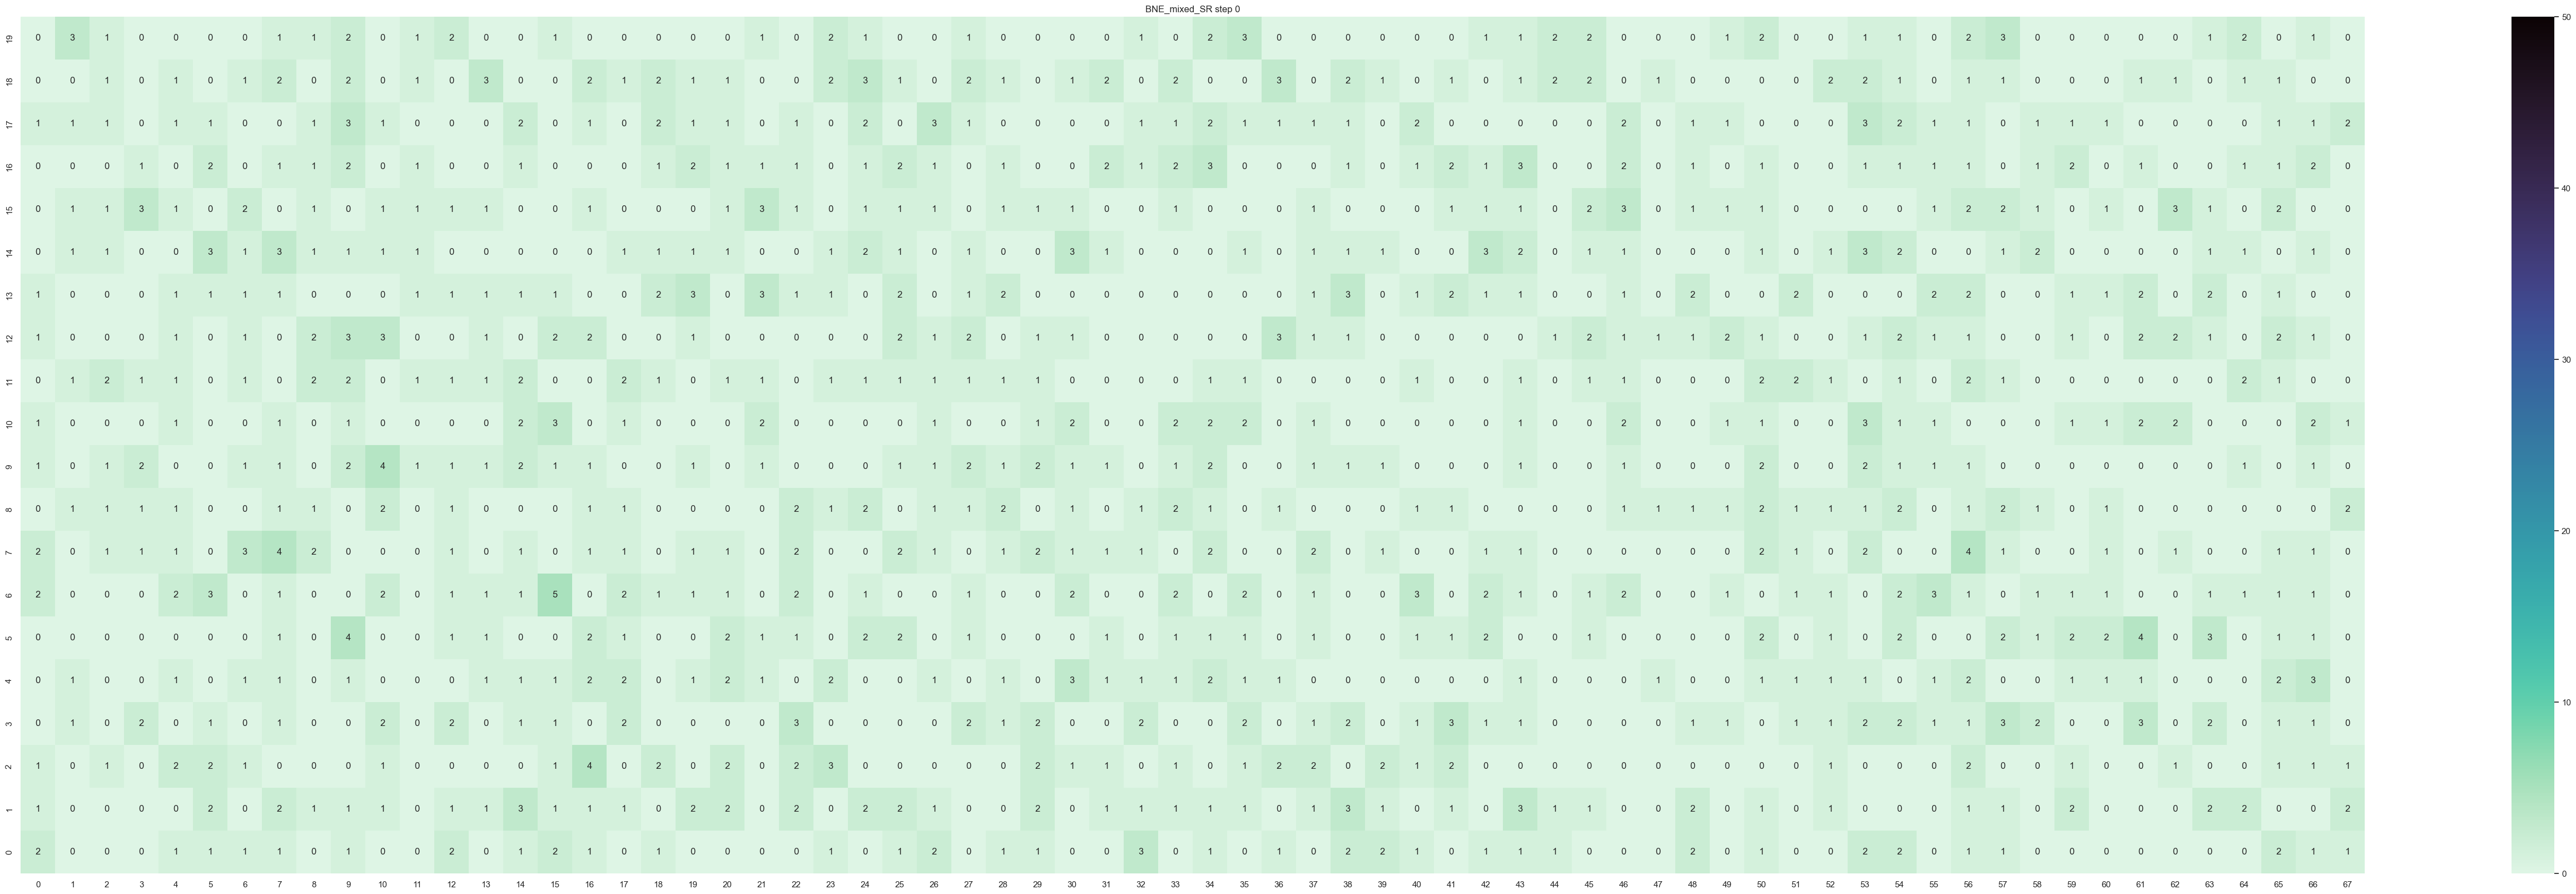

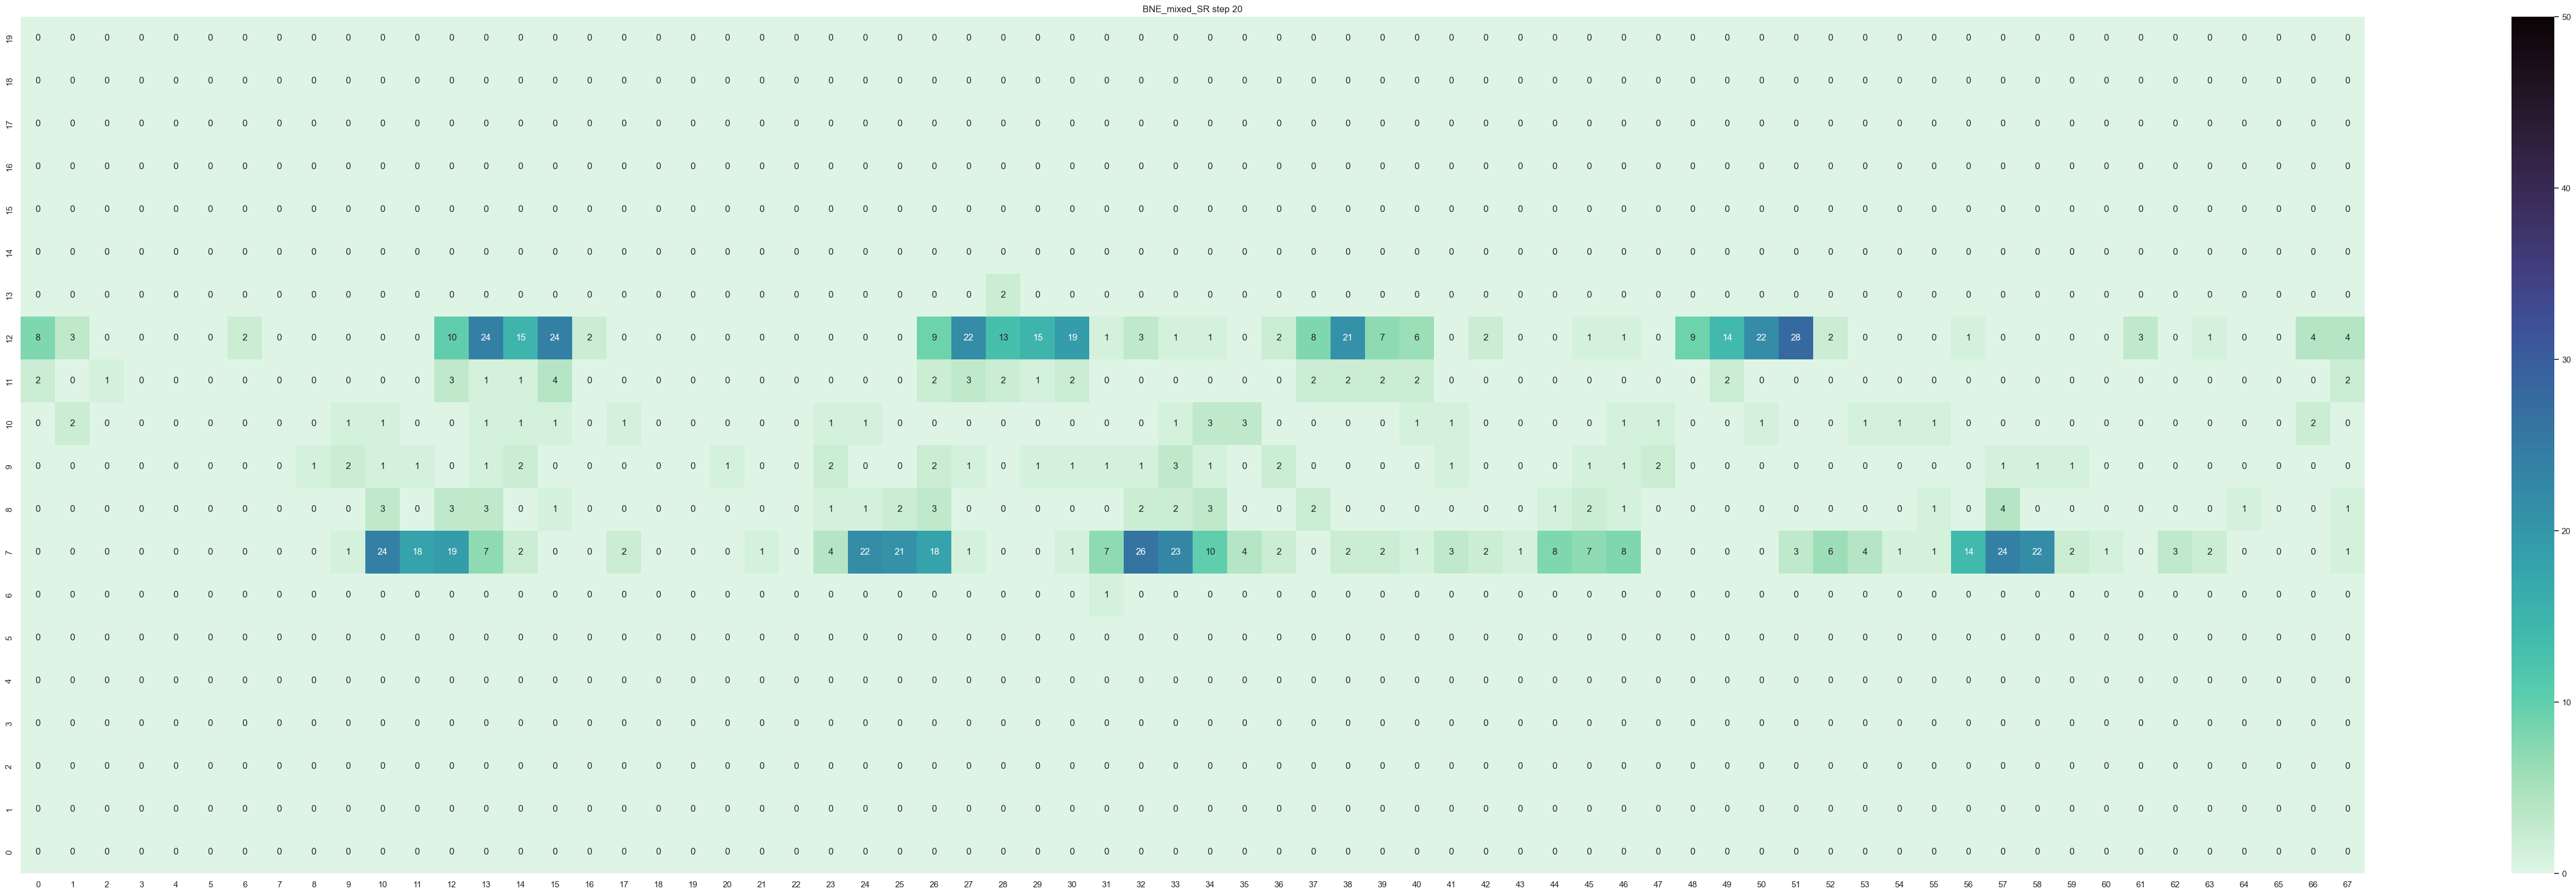

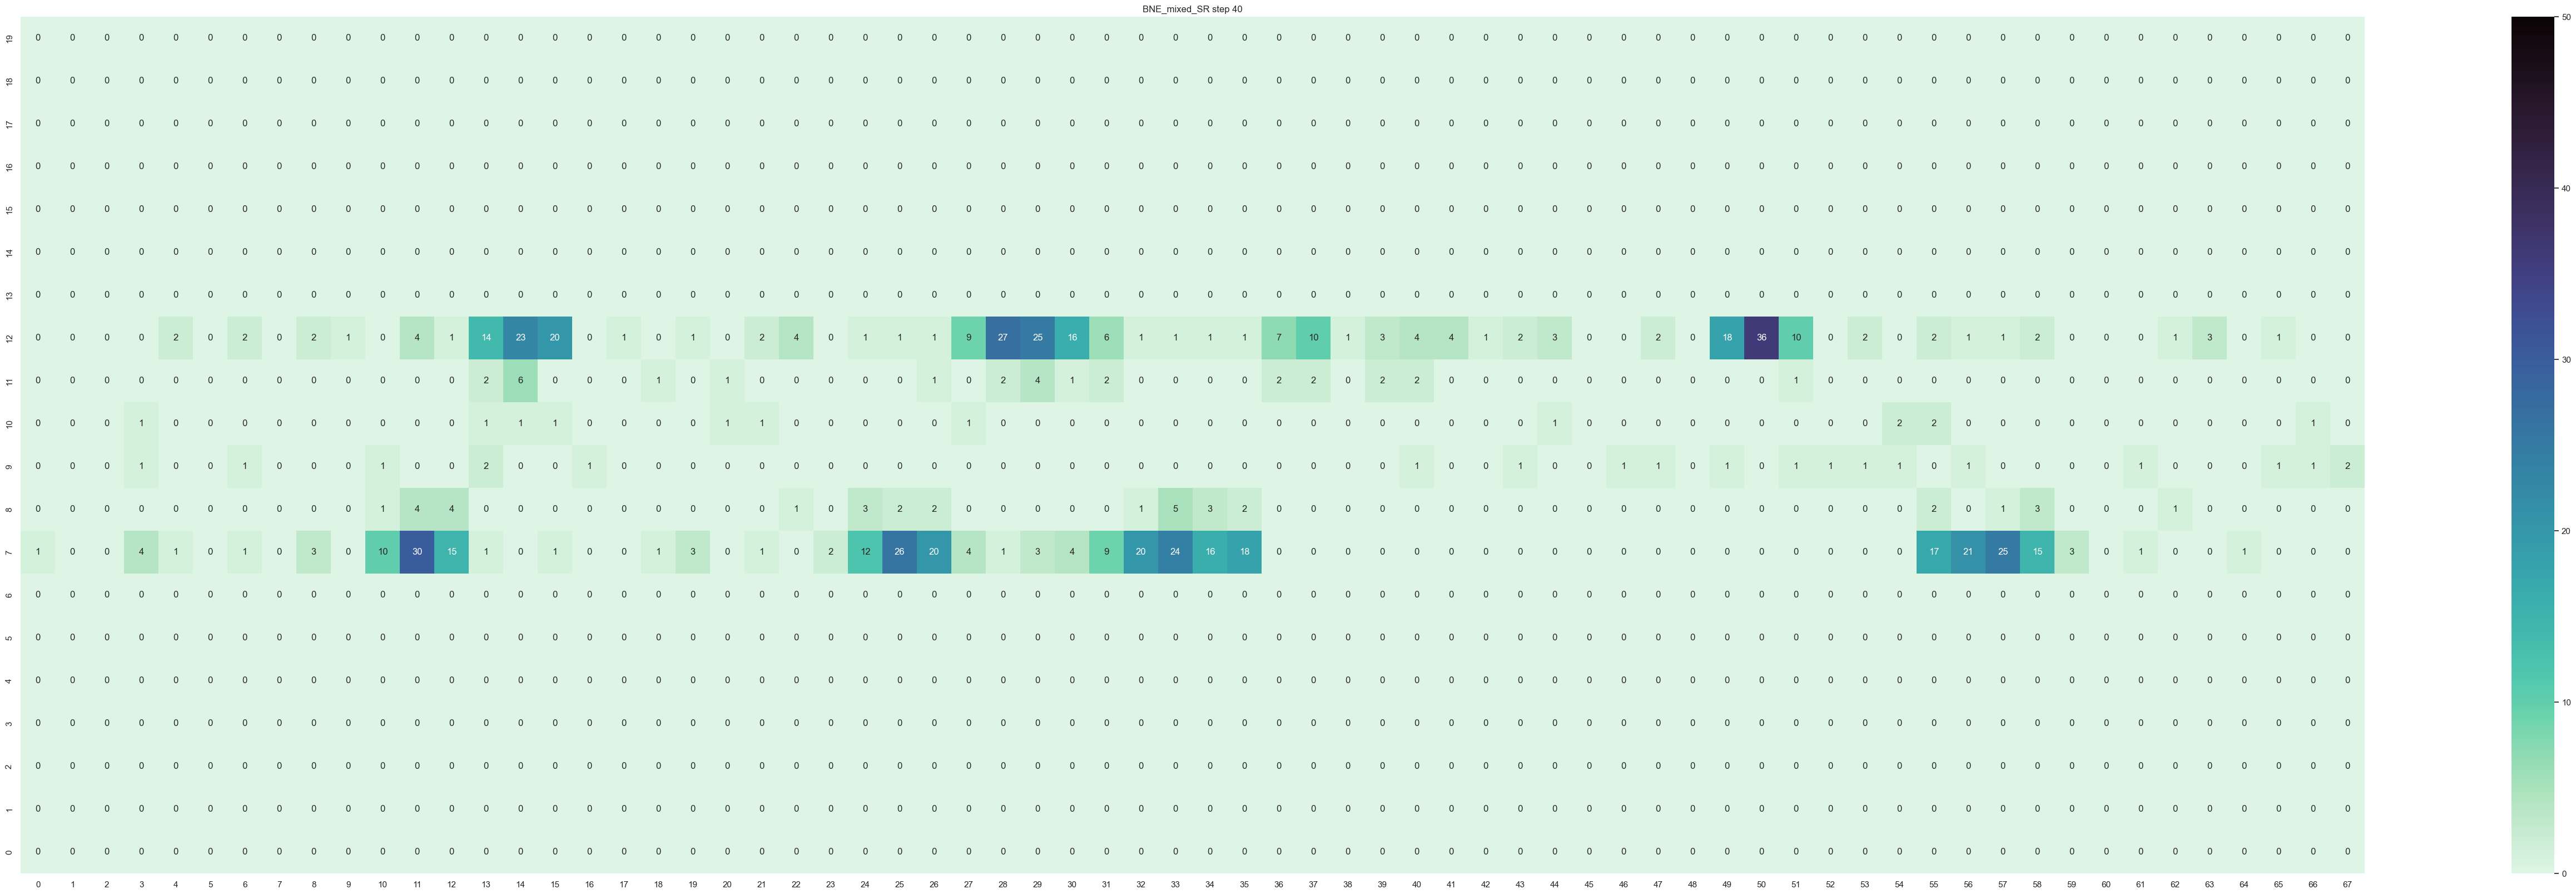

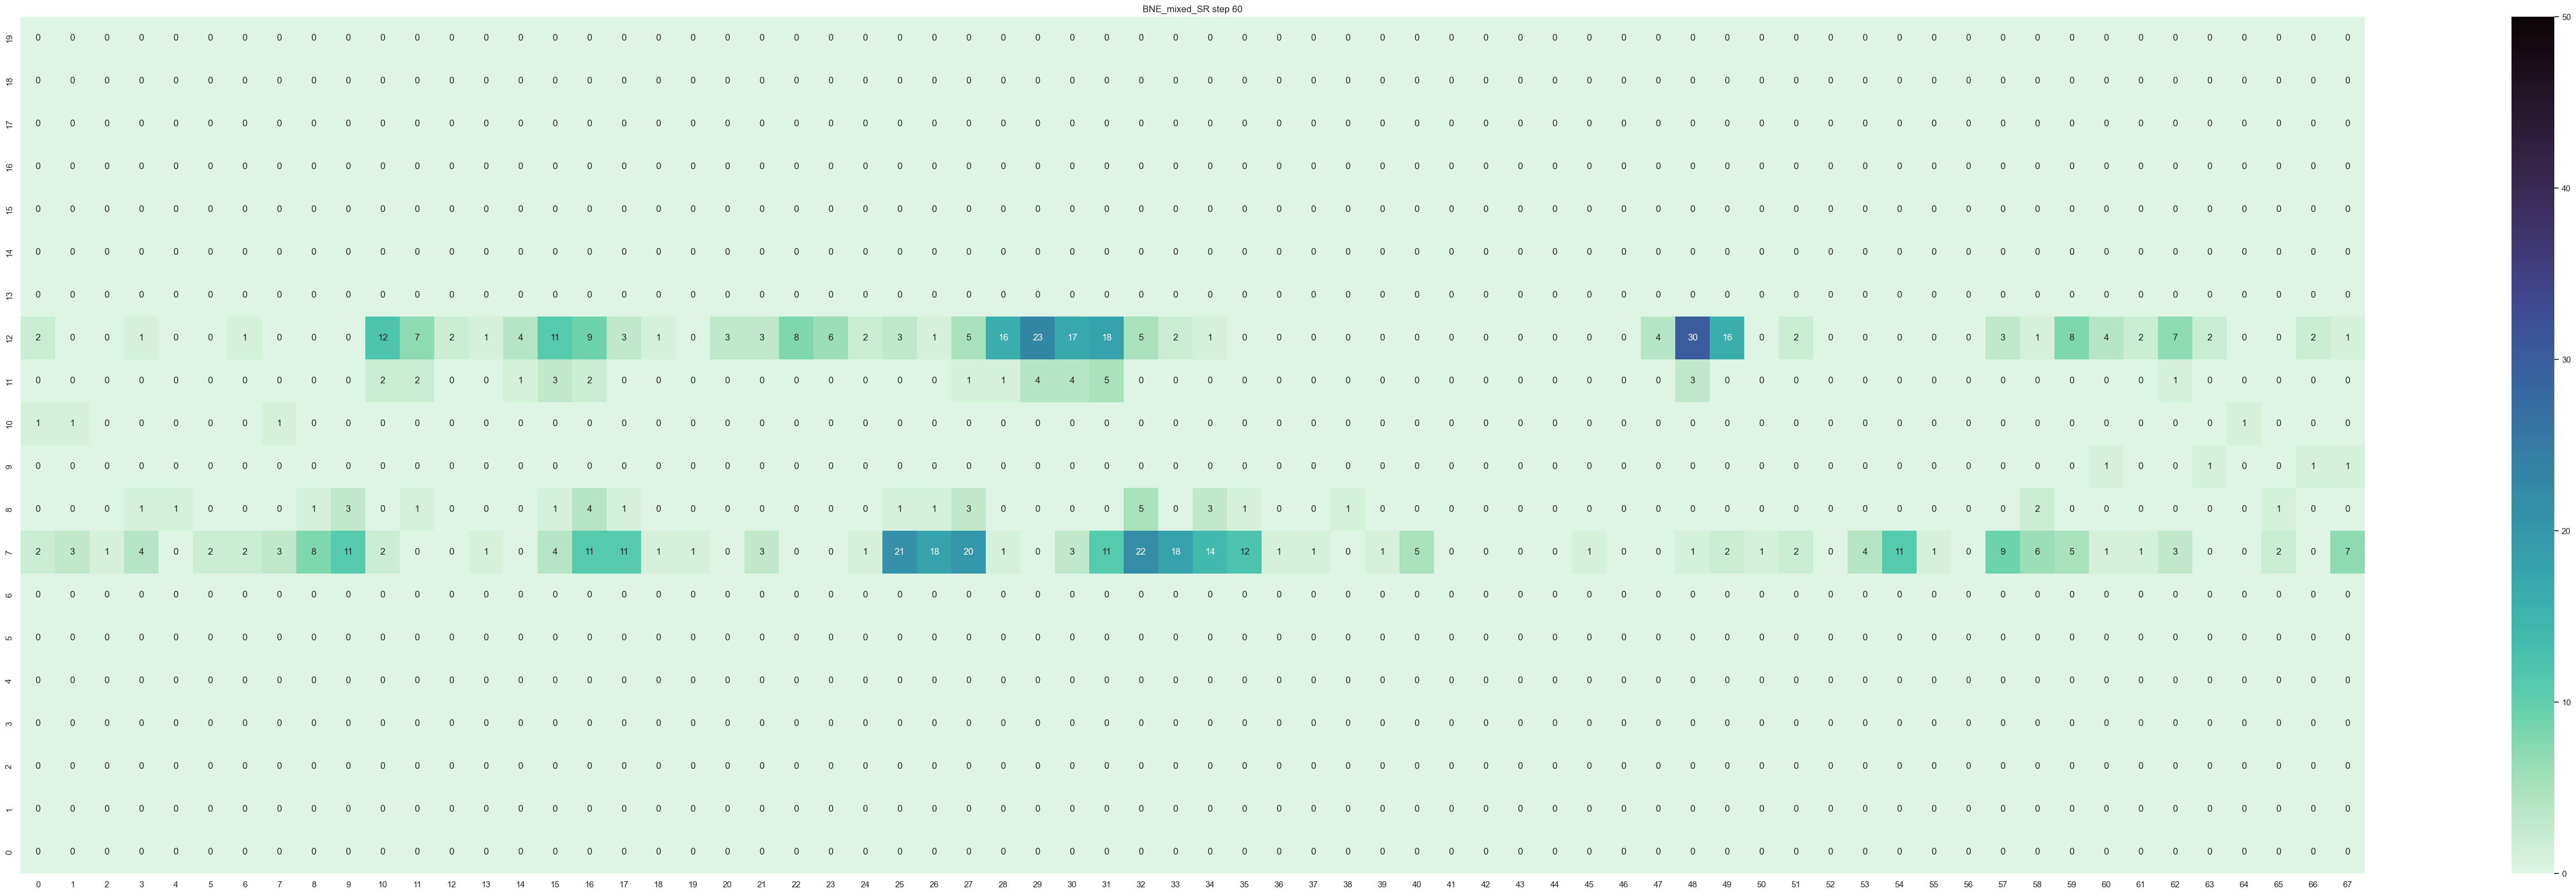

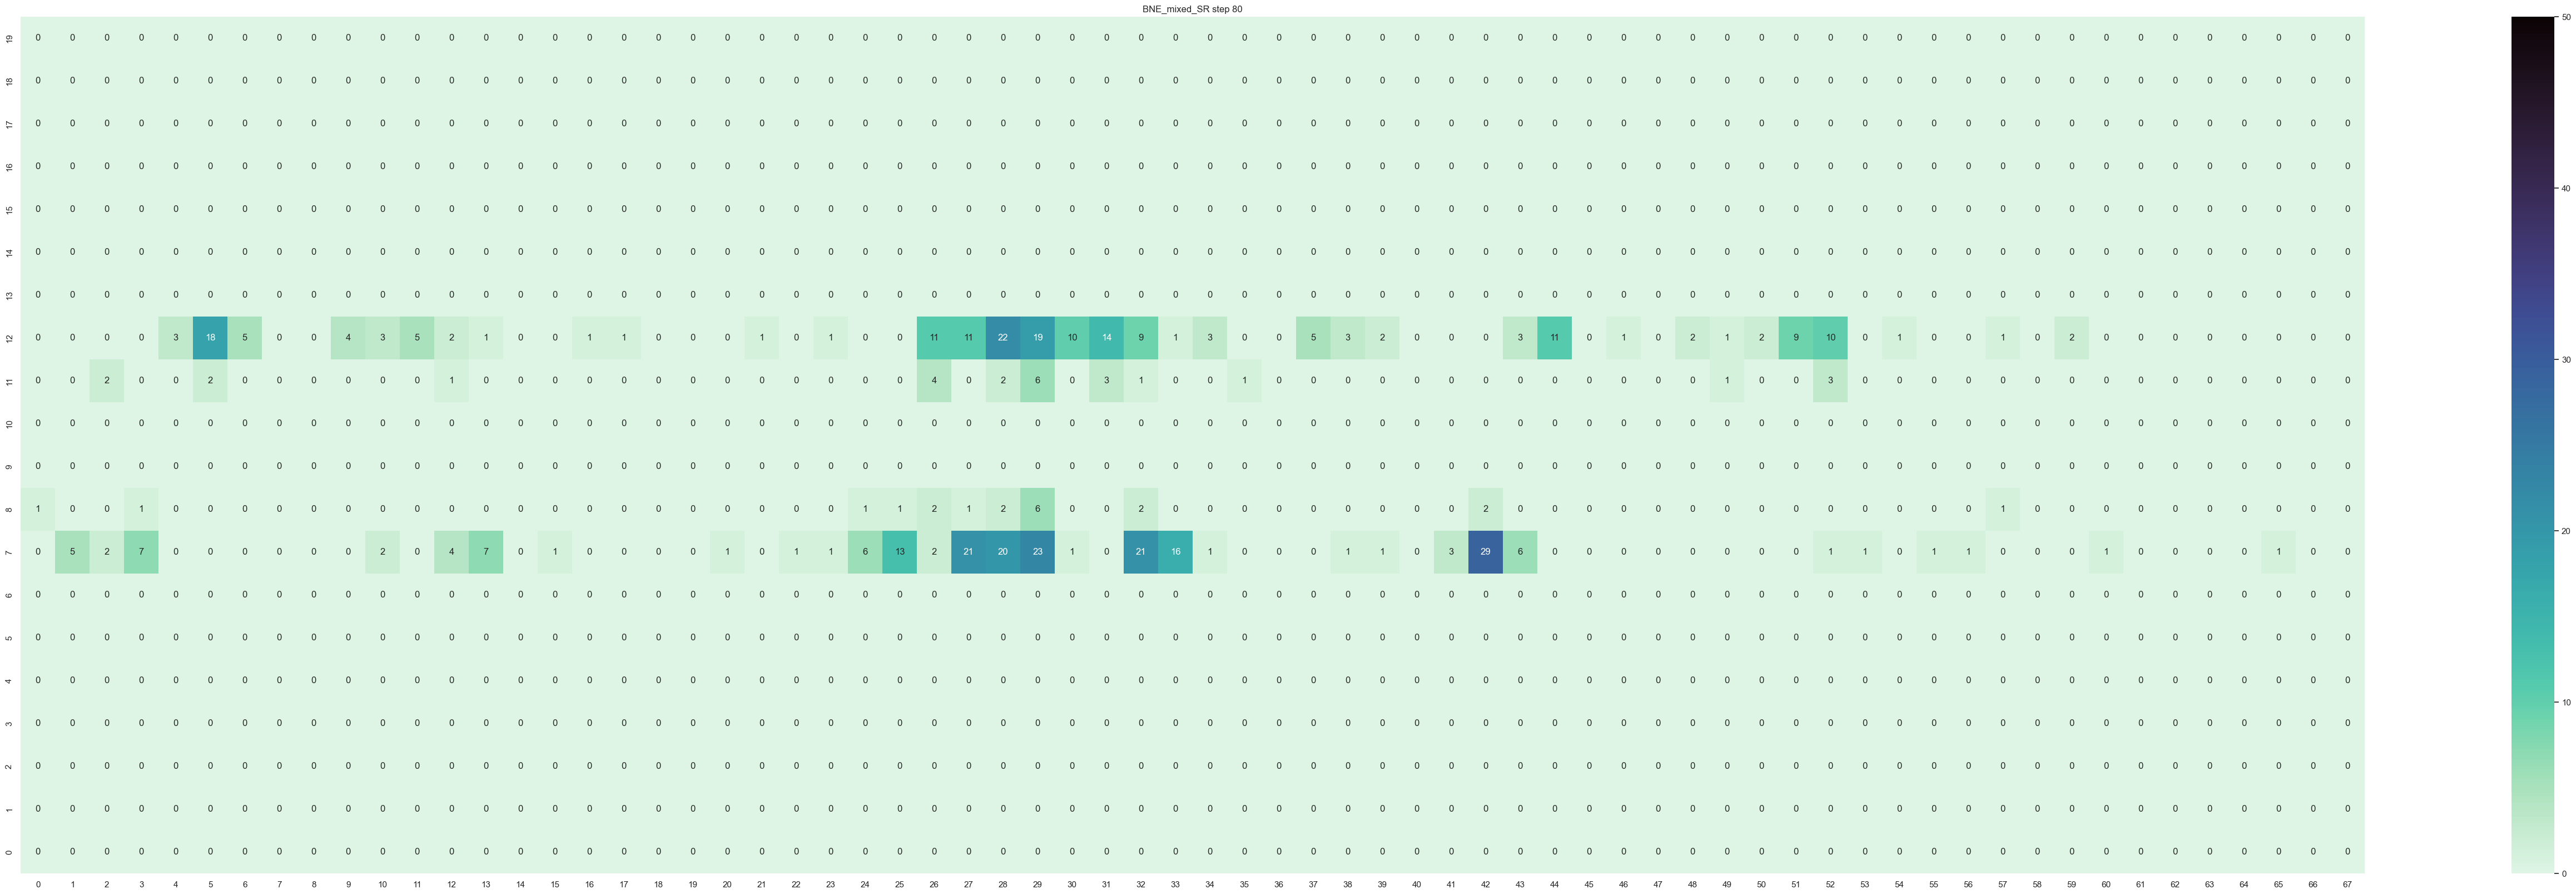

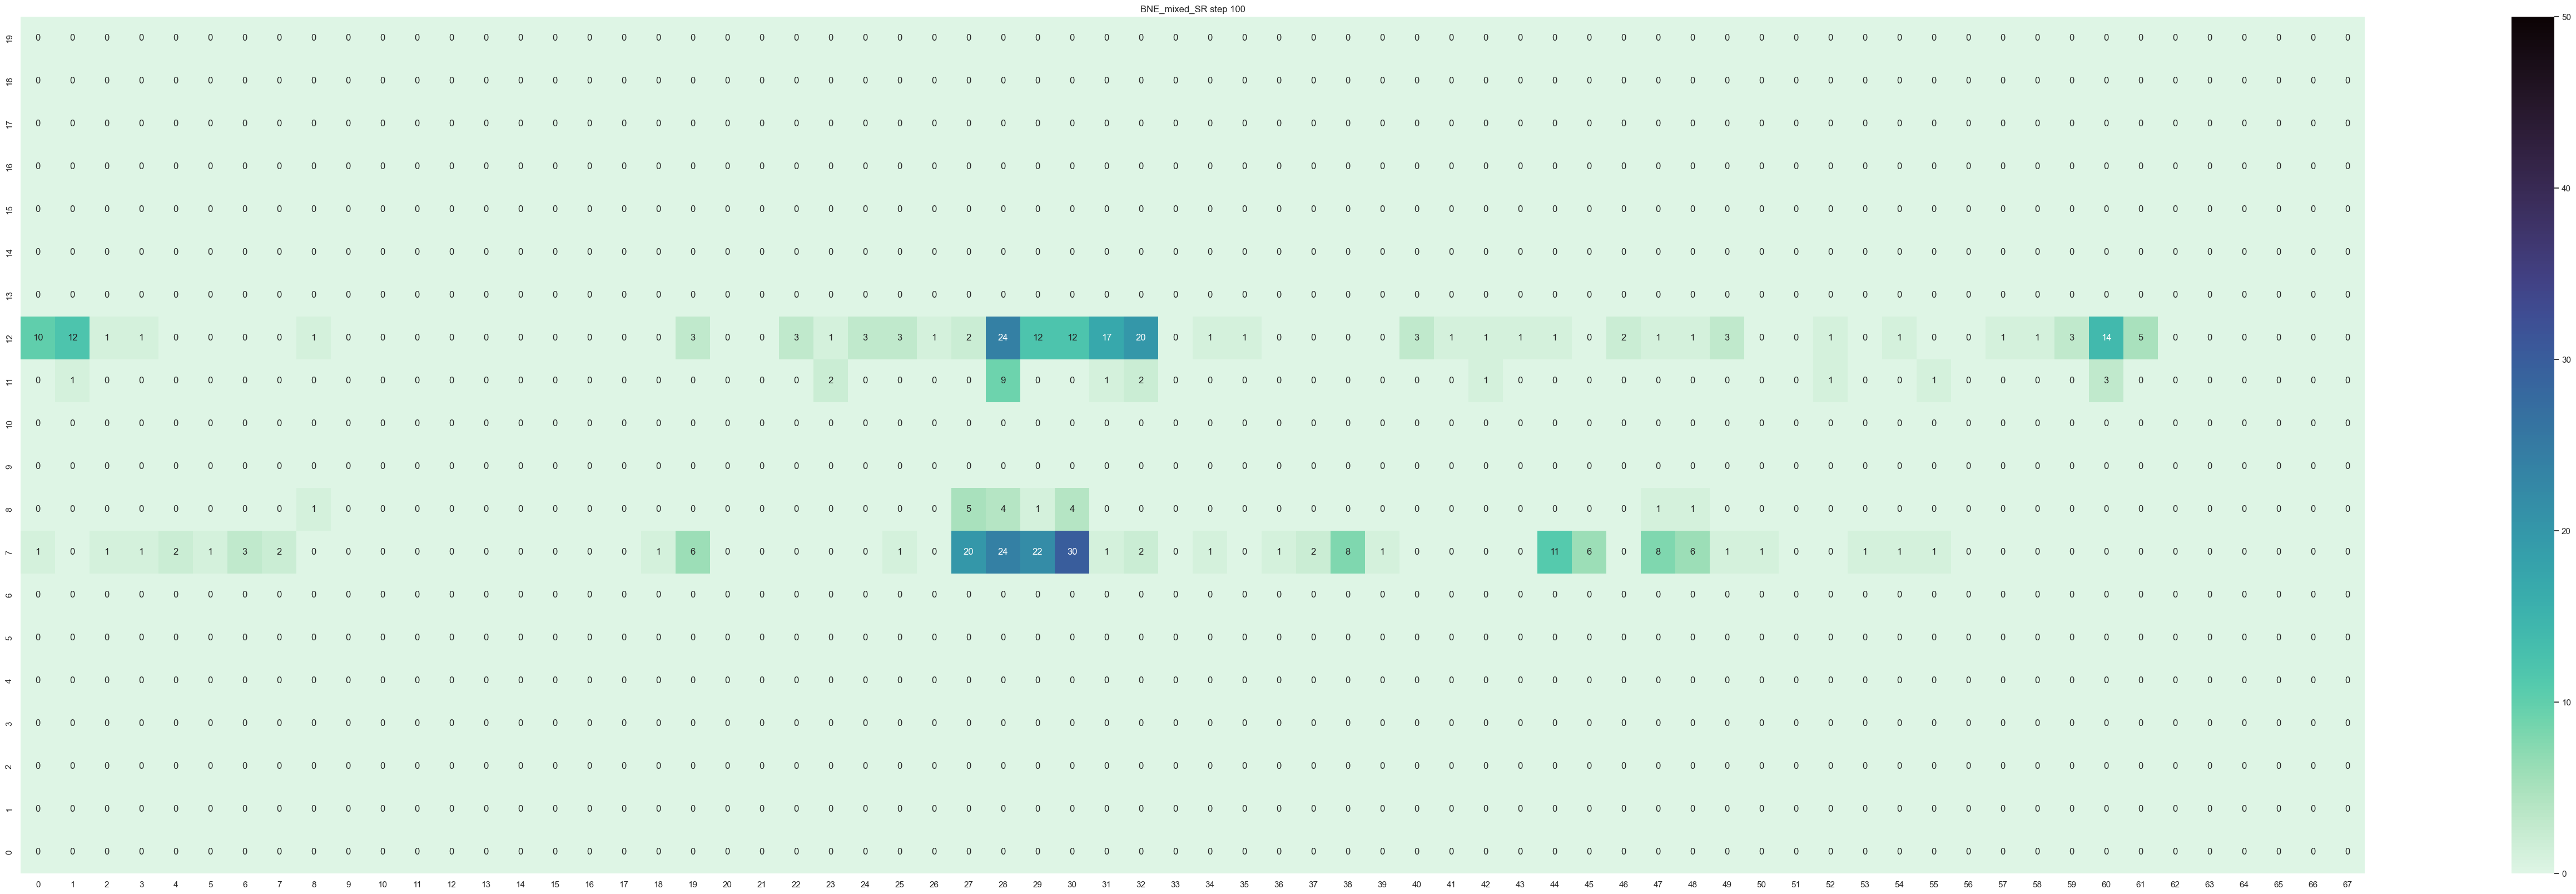

In [ ]:
frames(("BNE_mixed_SR", 0))

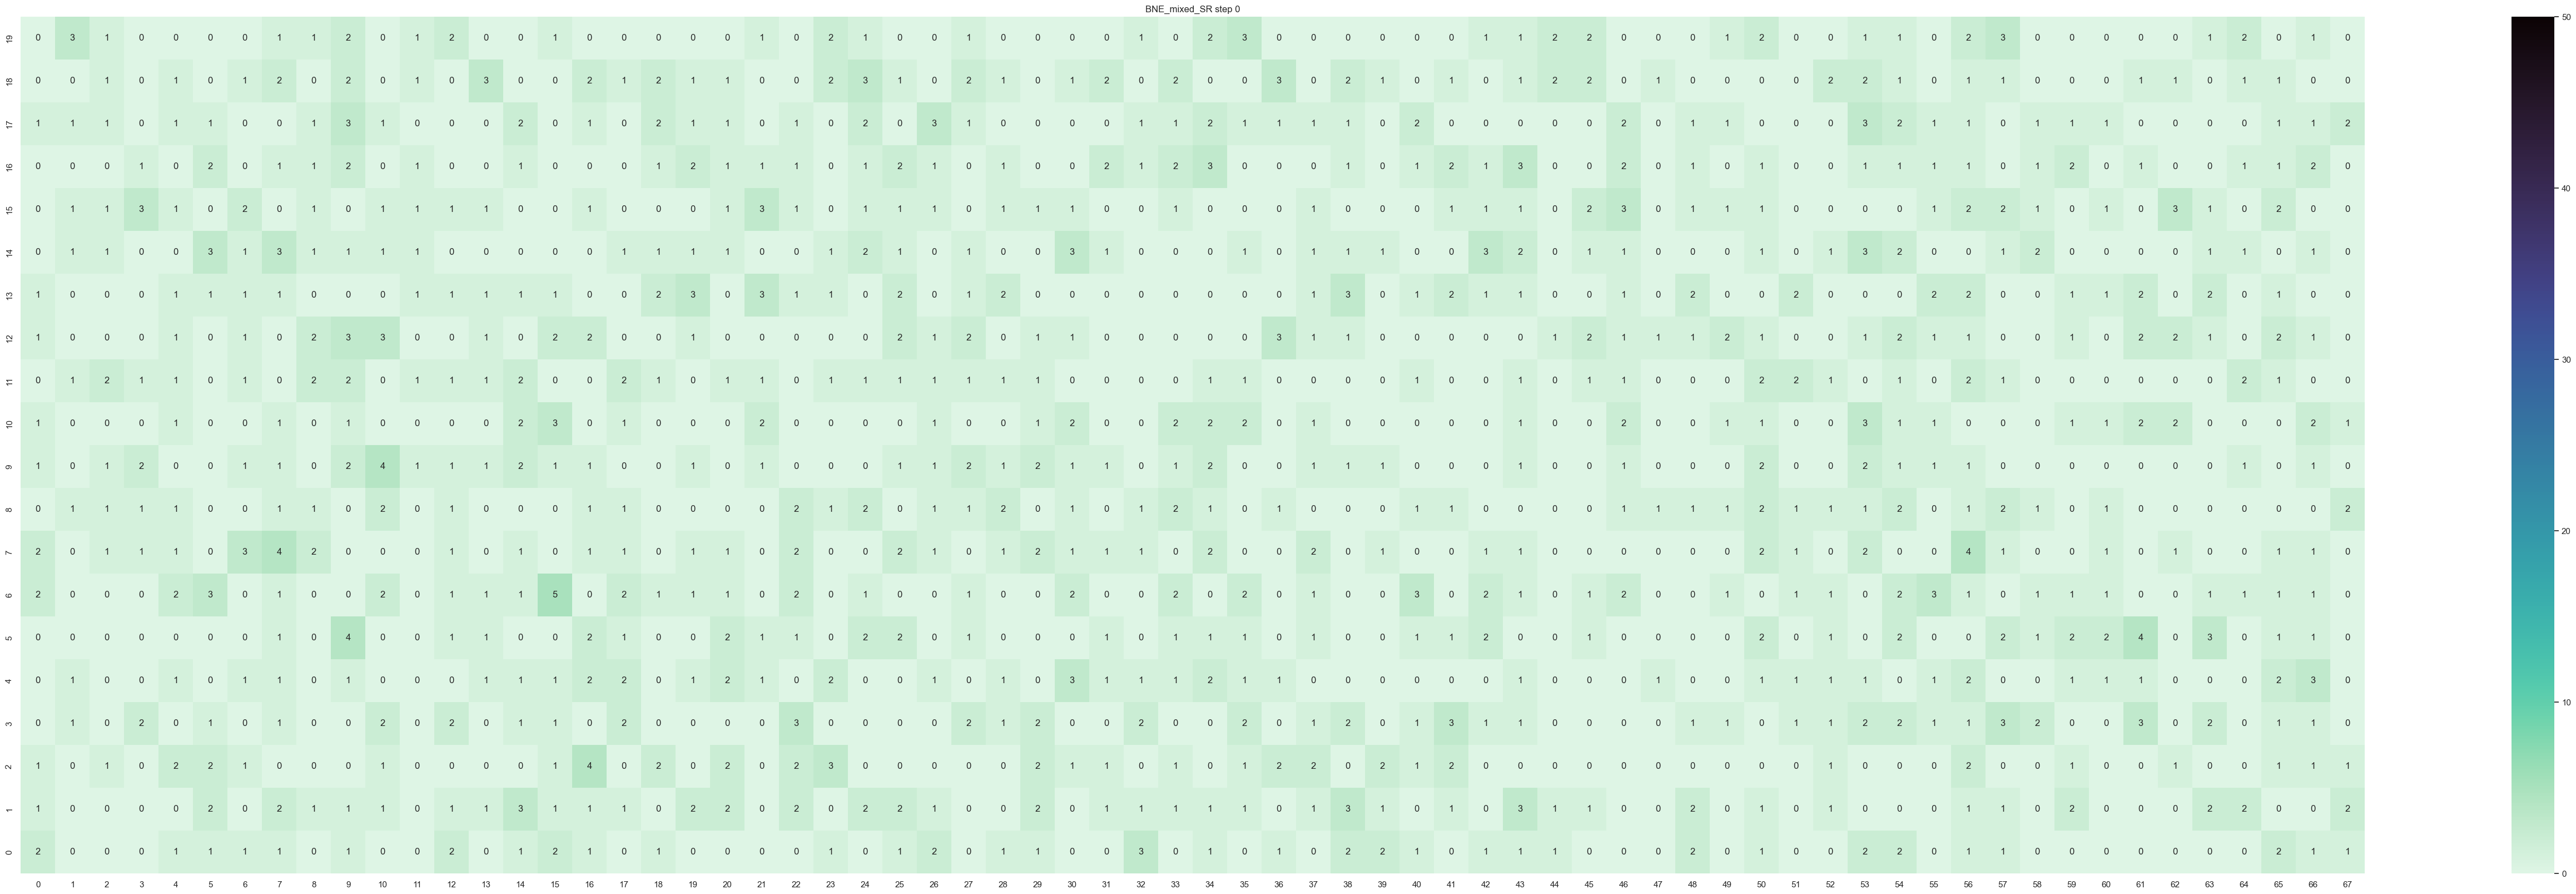

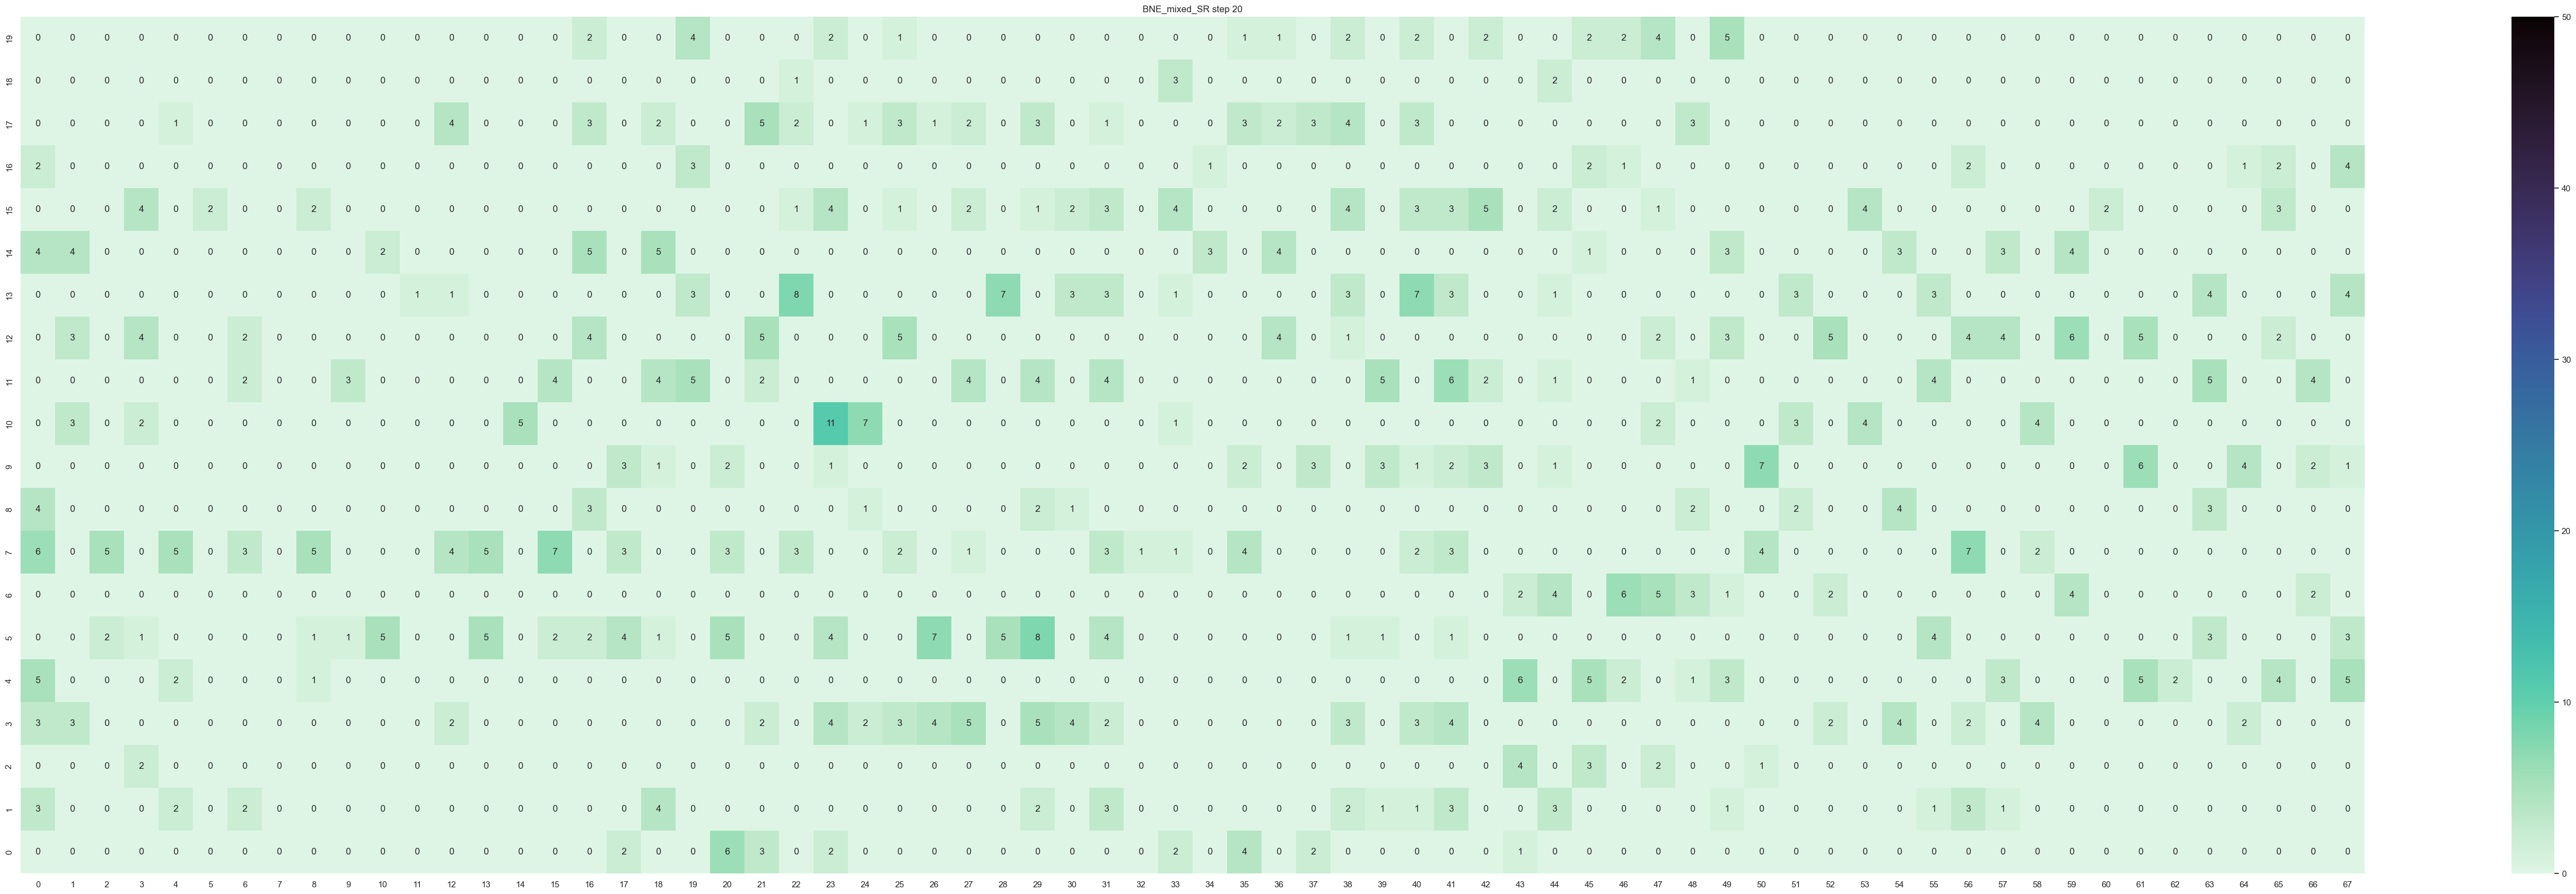

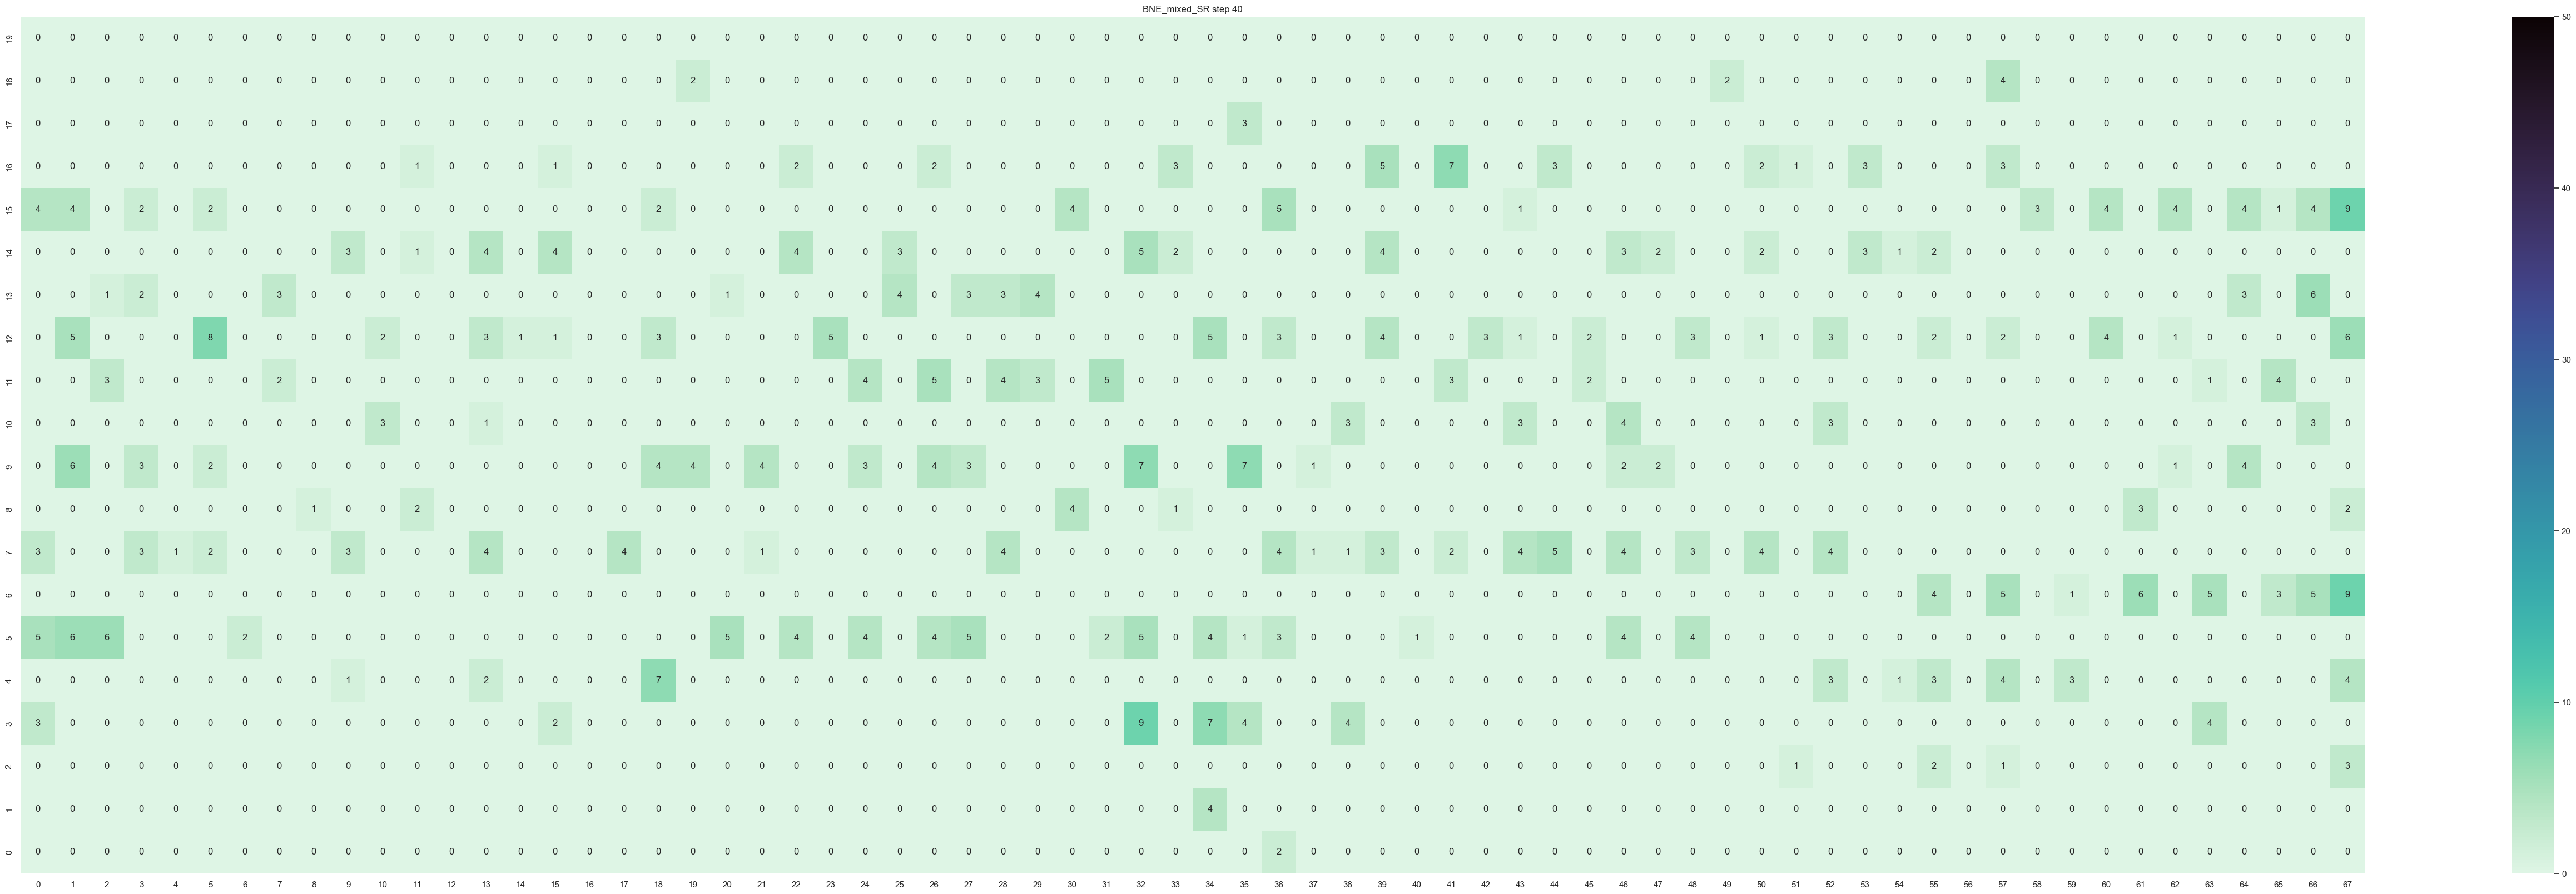

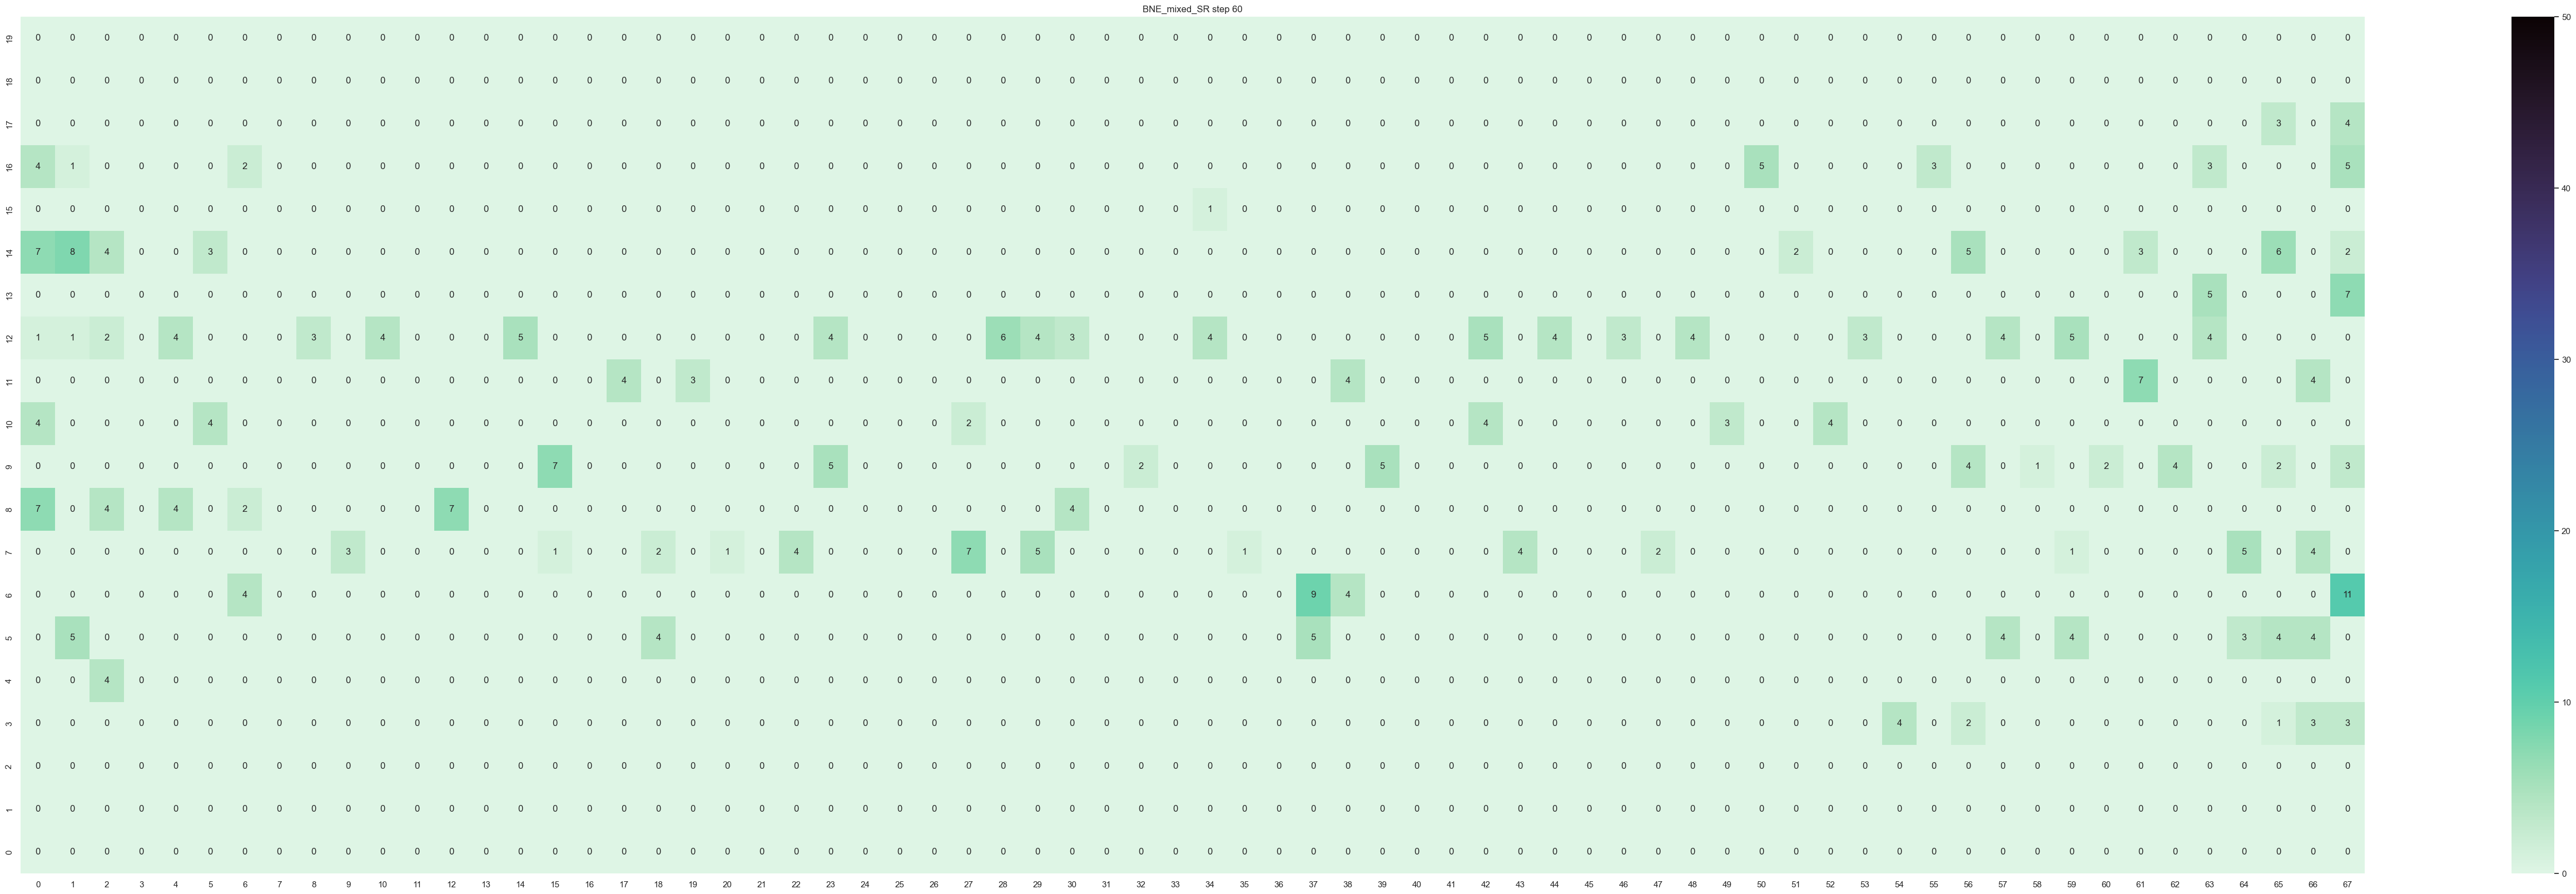

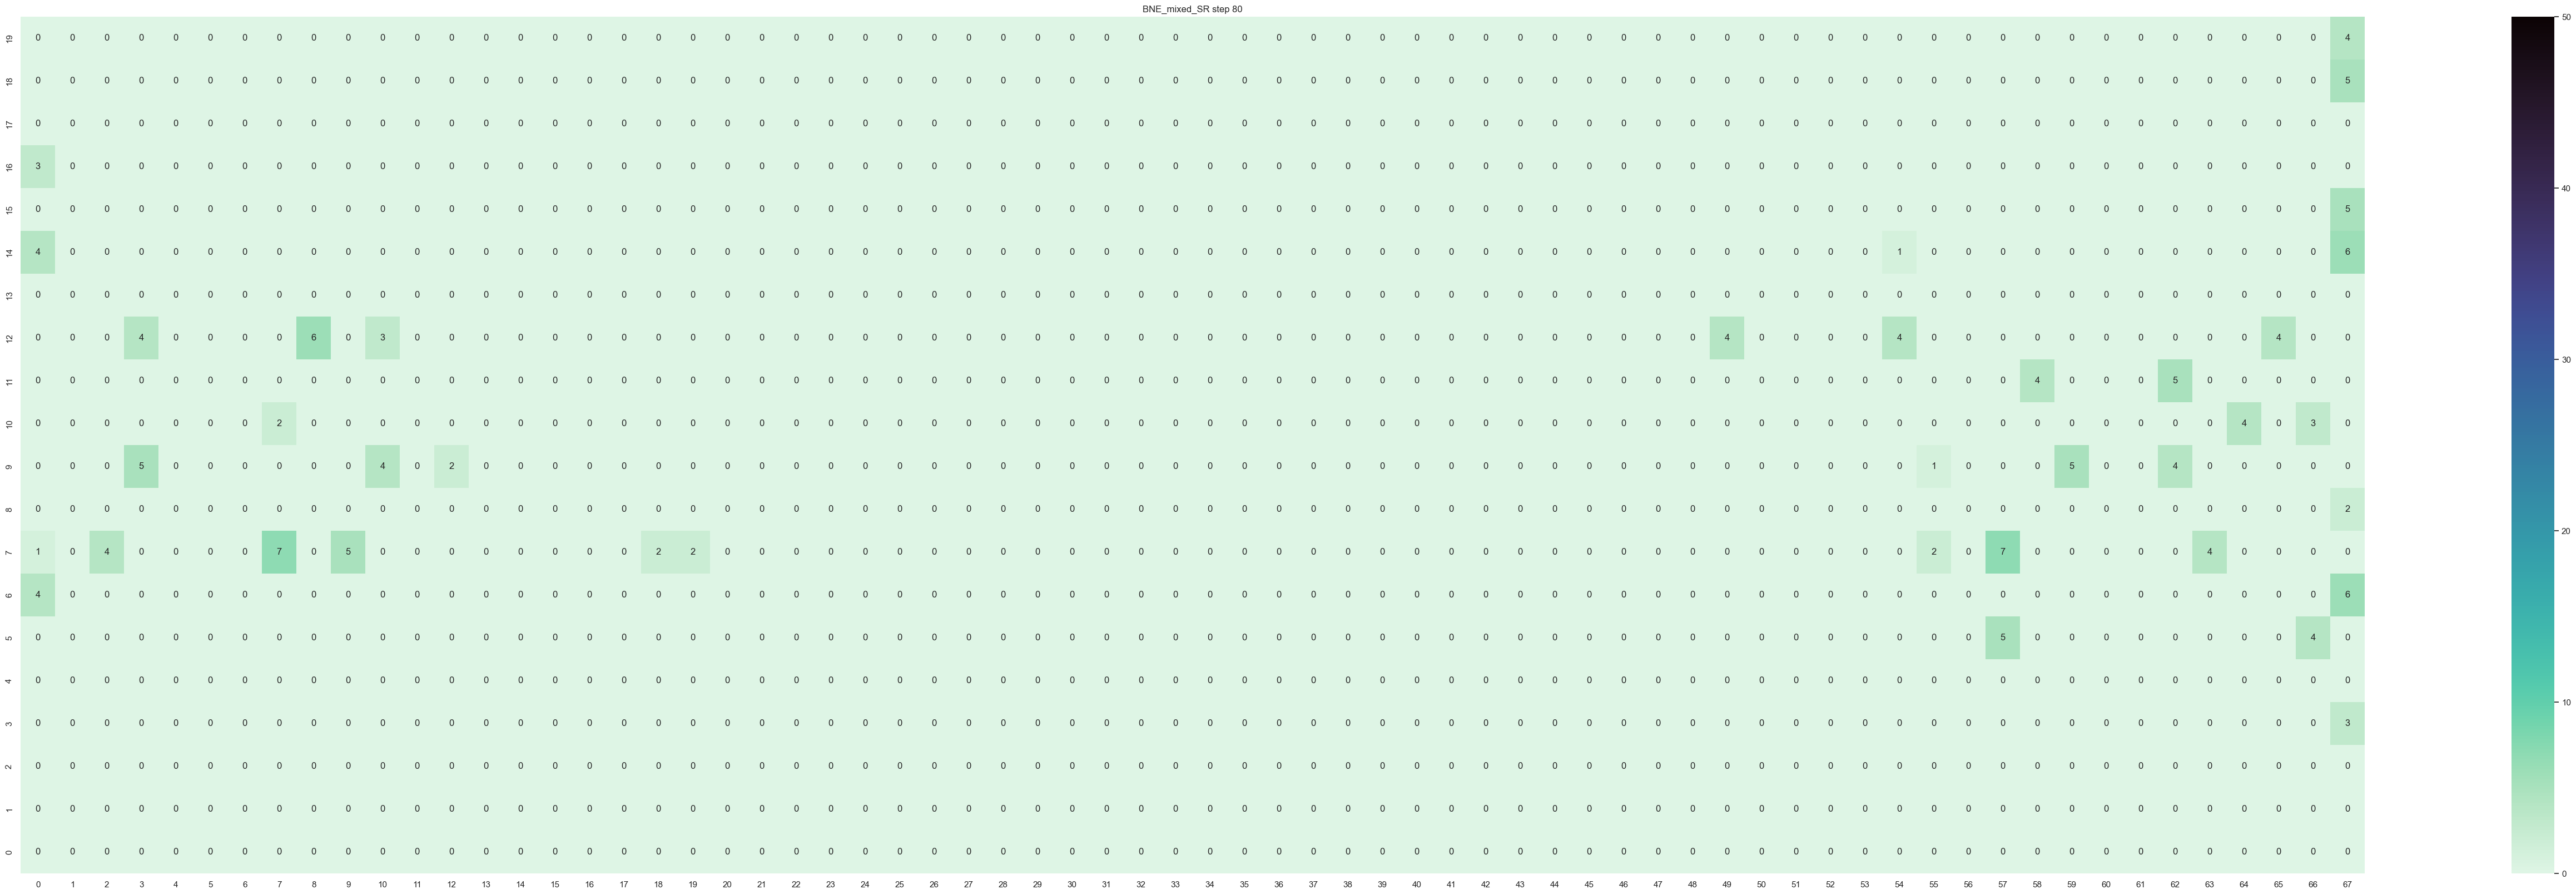

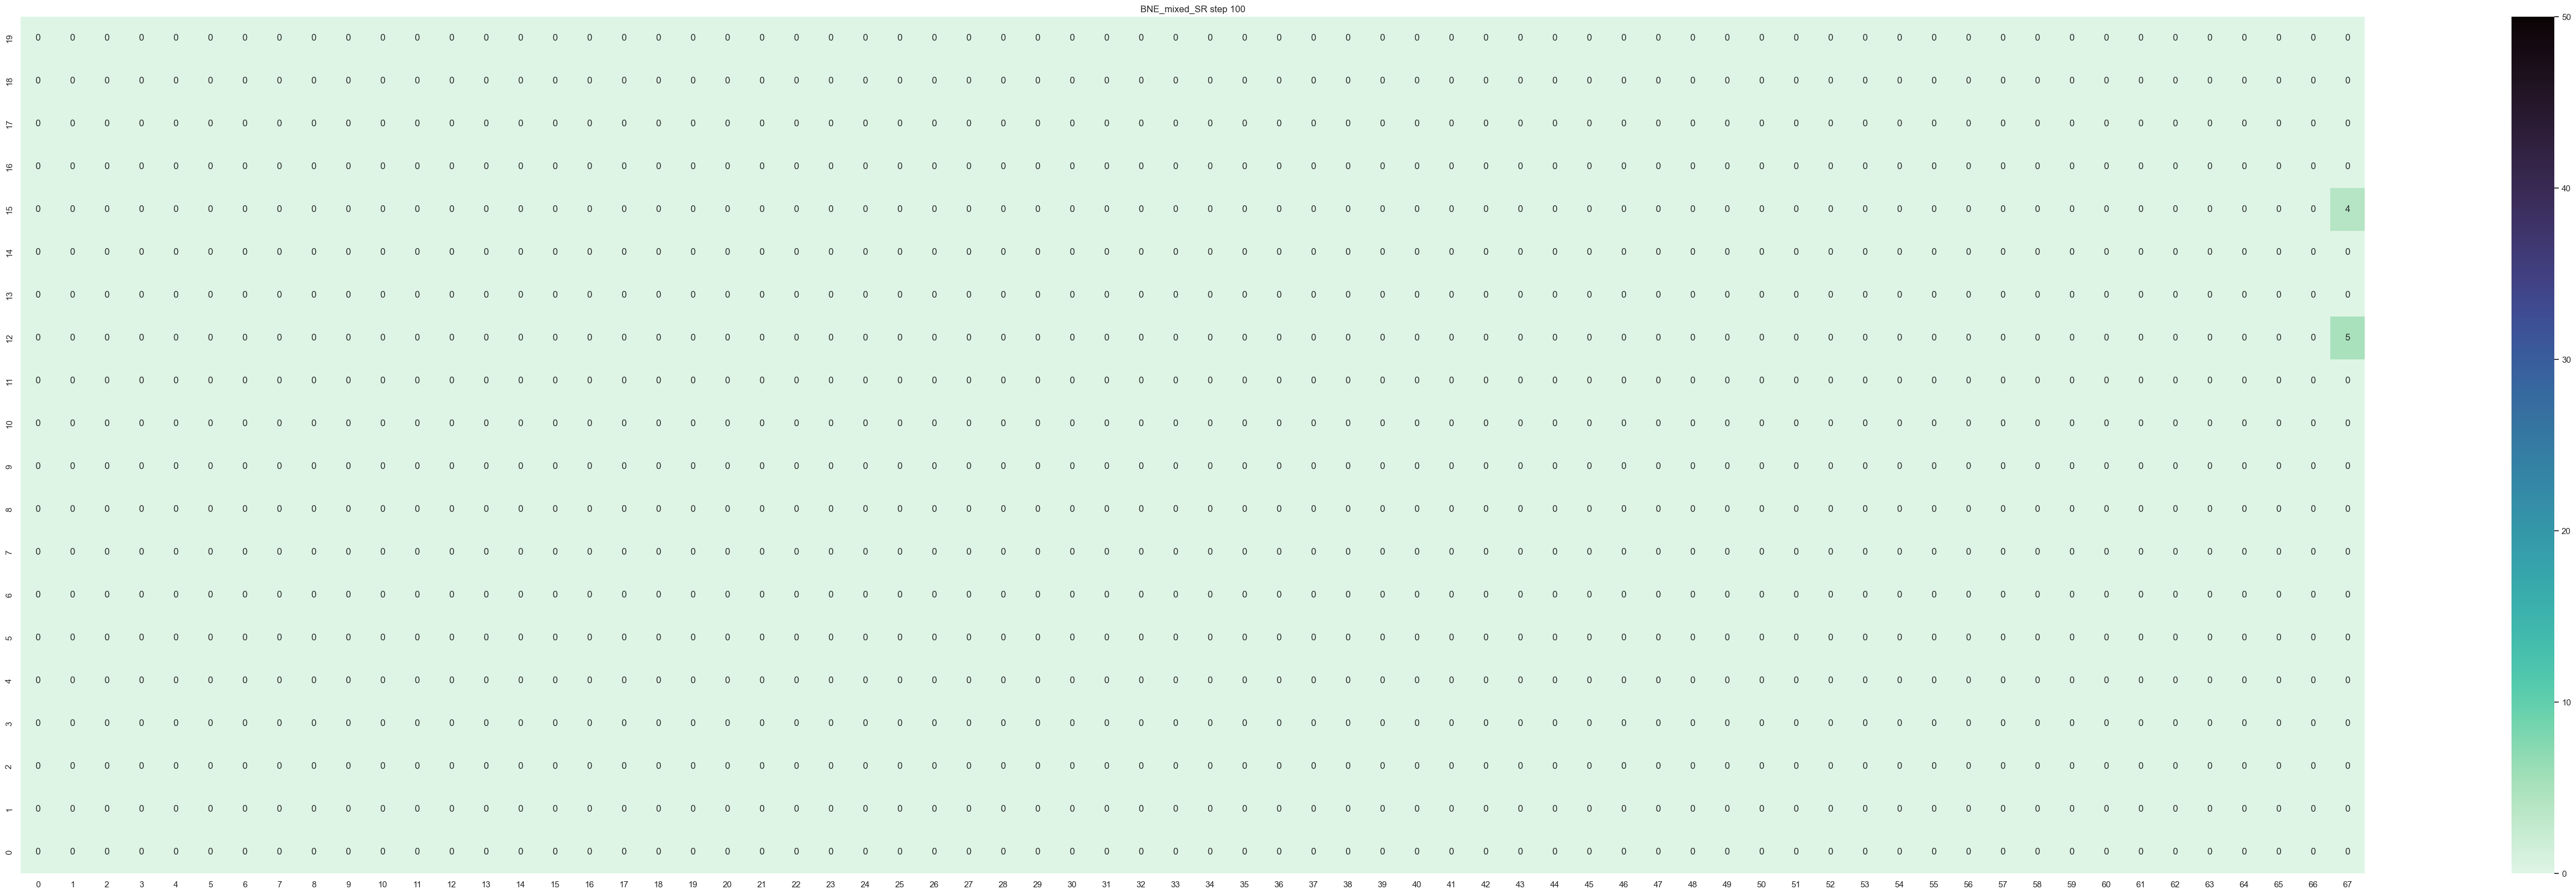

In [ ]:
frames(("BNE_mixed_SR", 100))

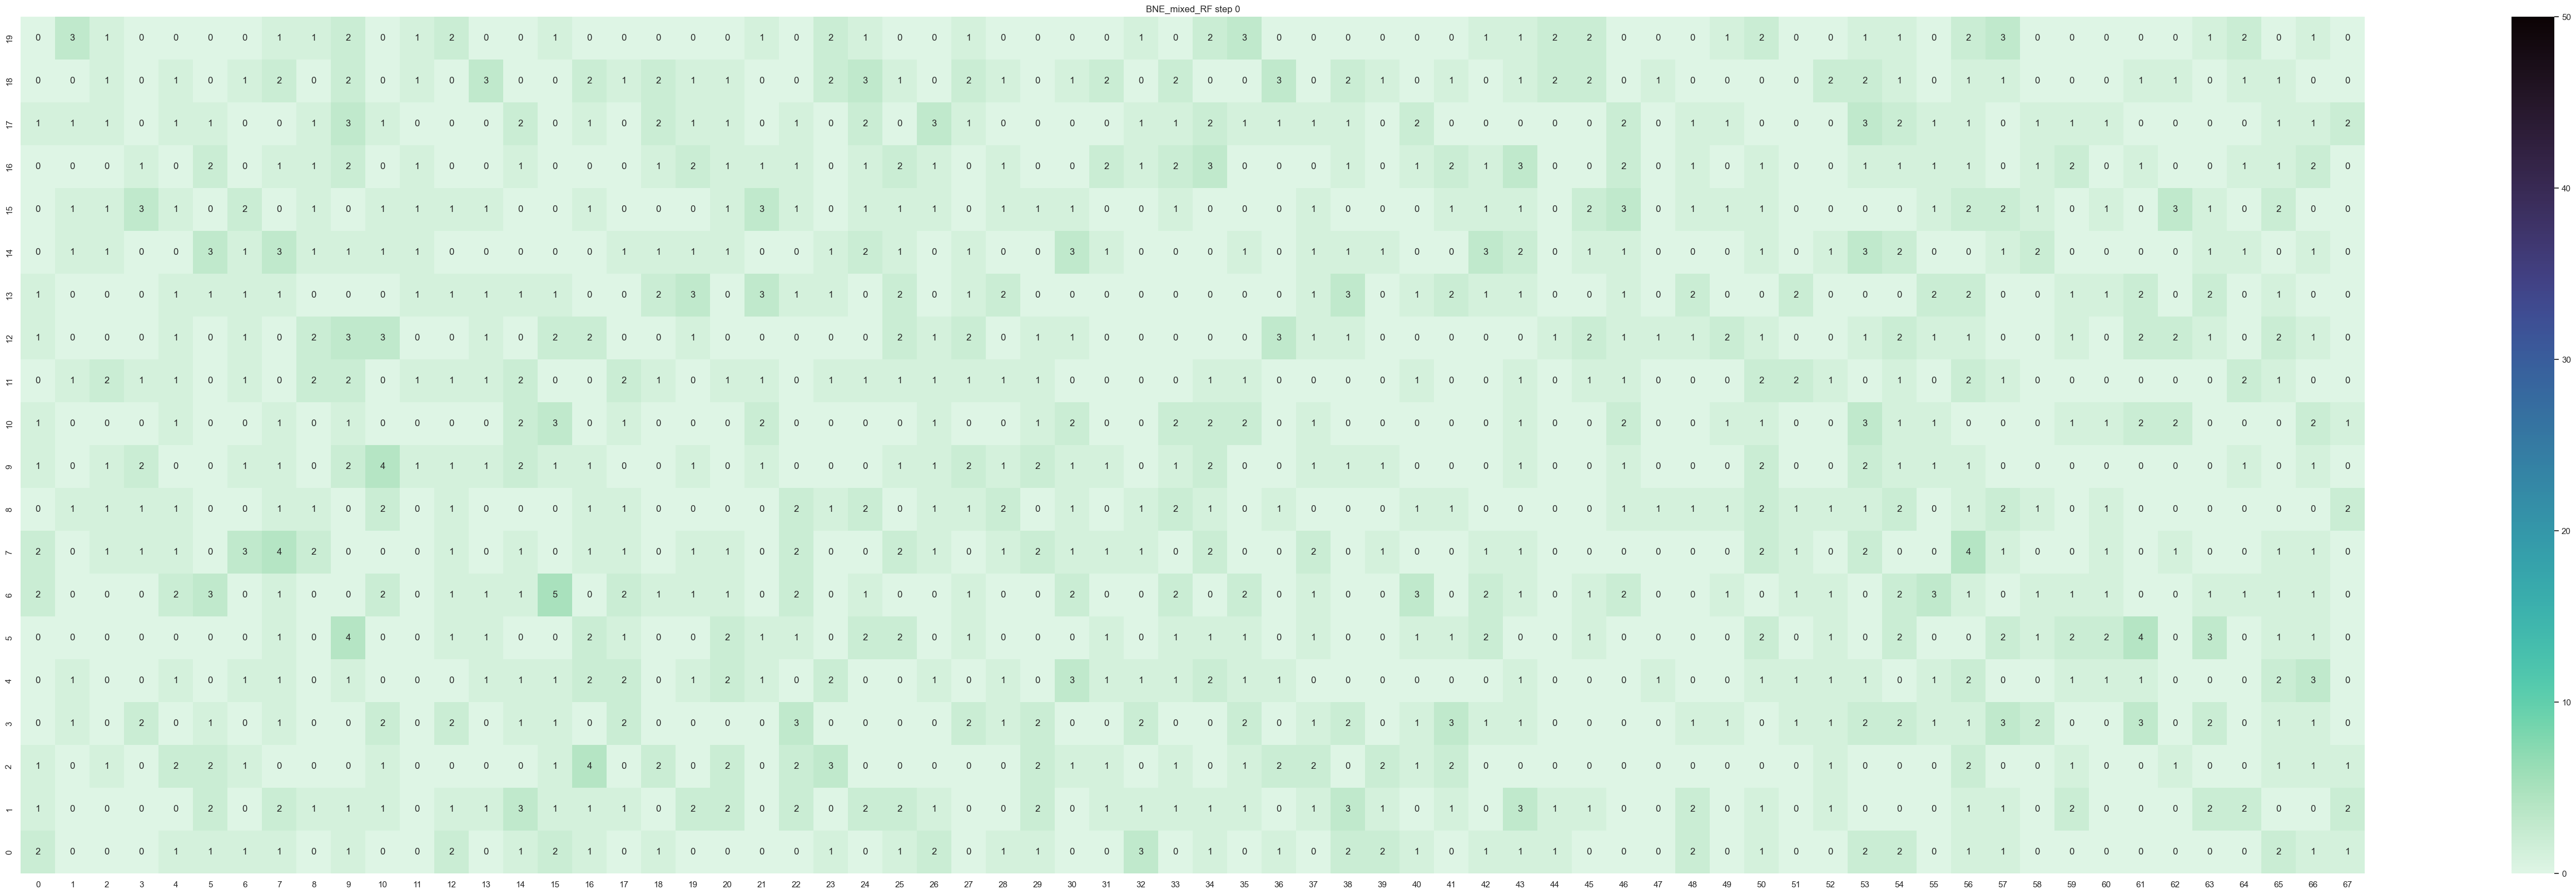

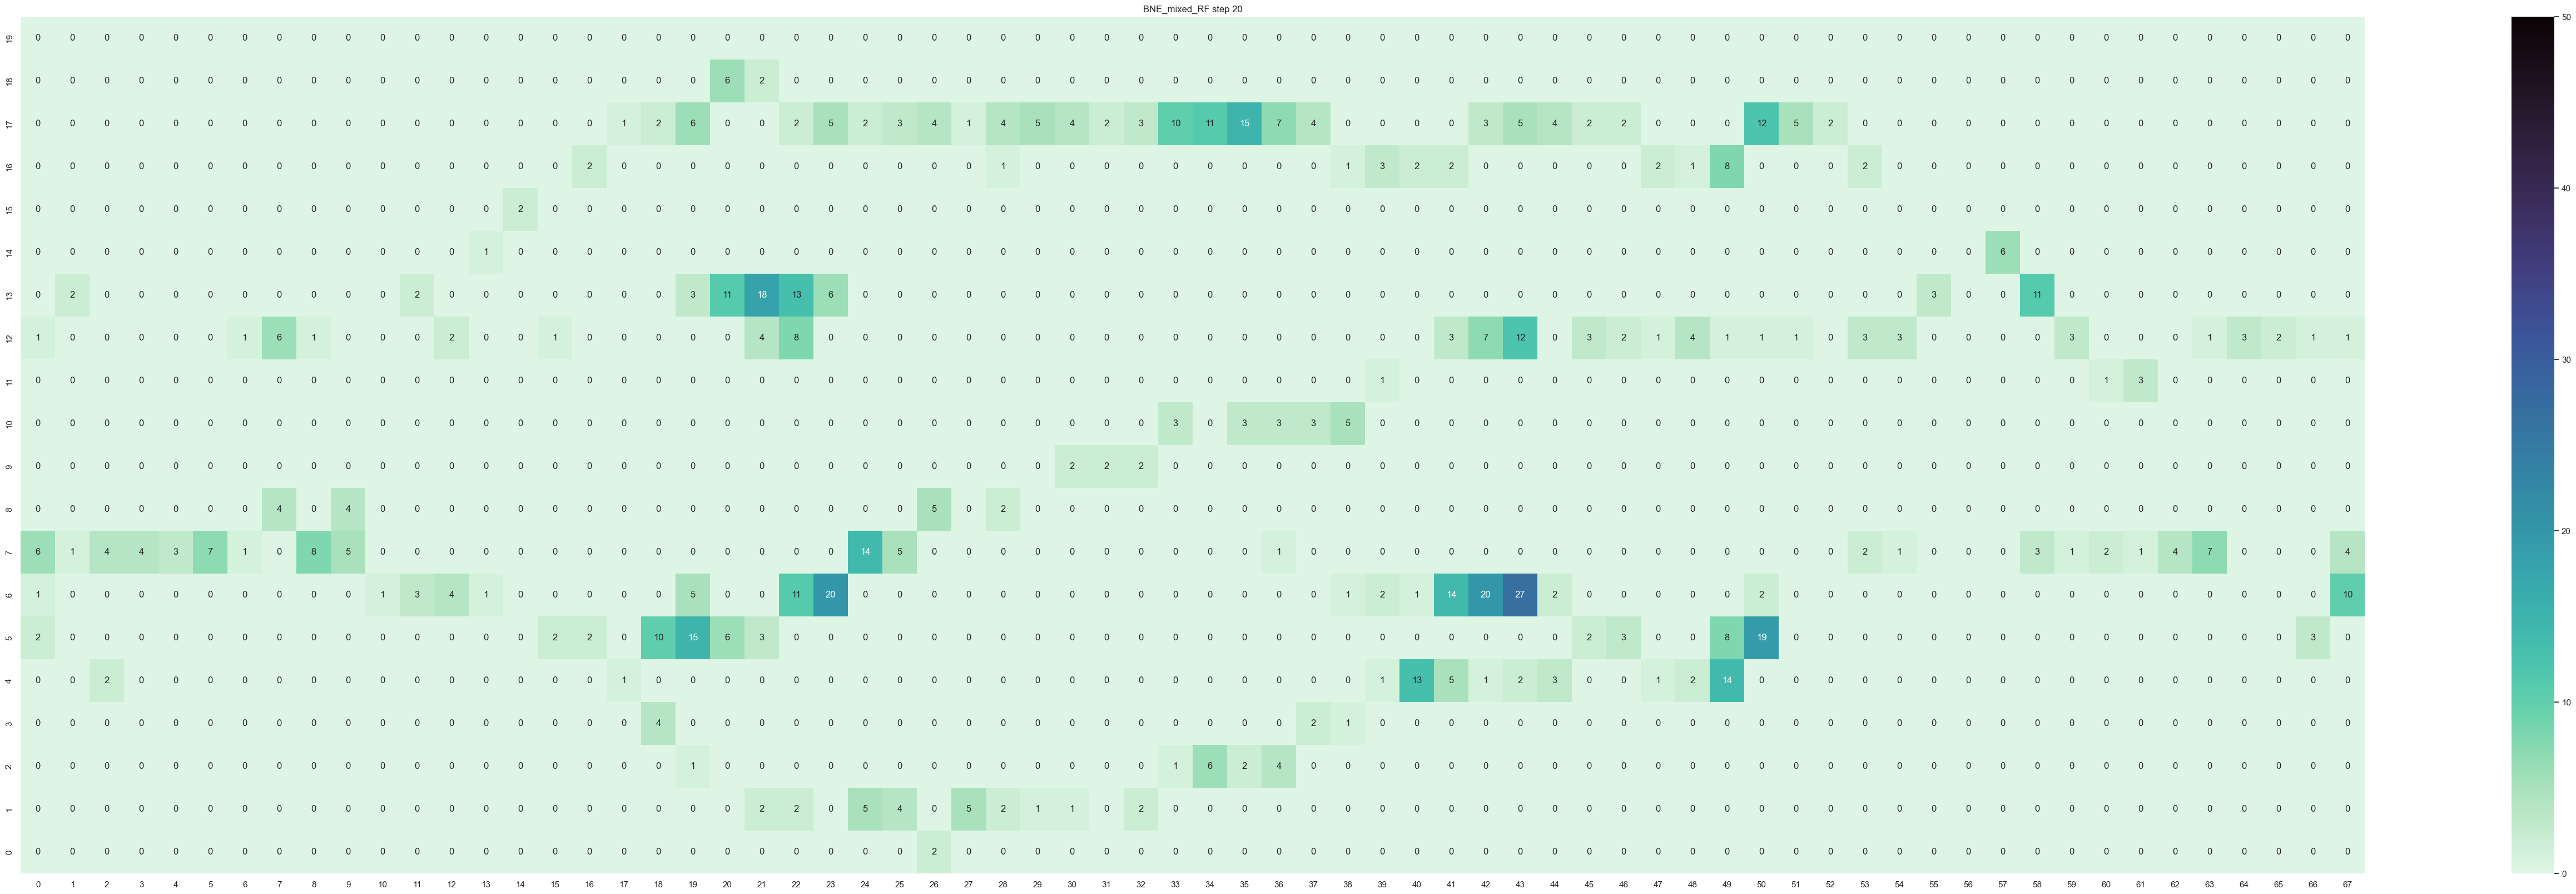

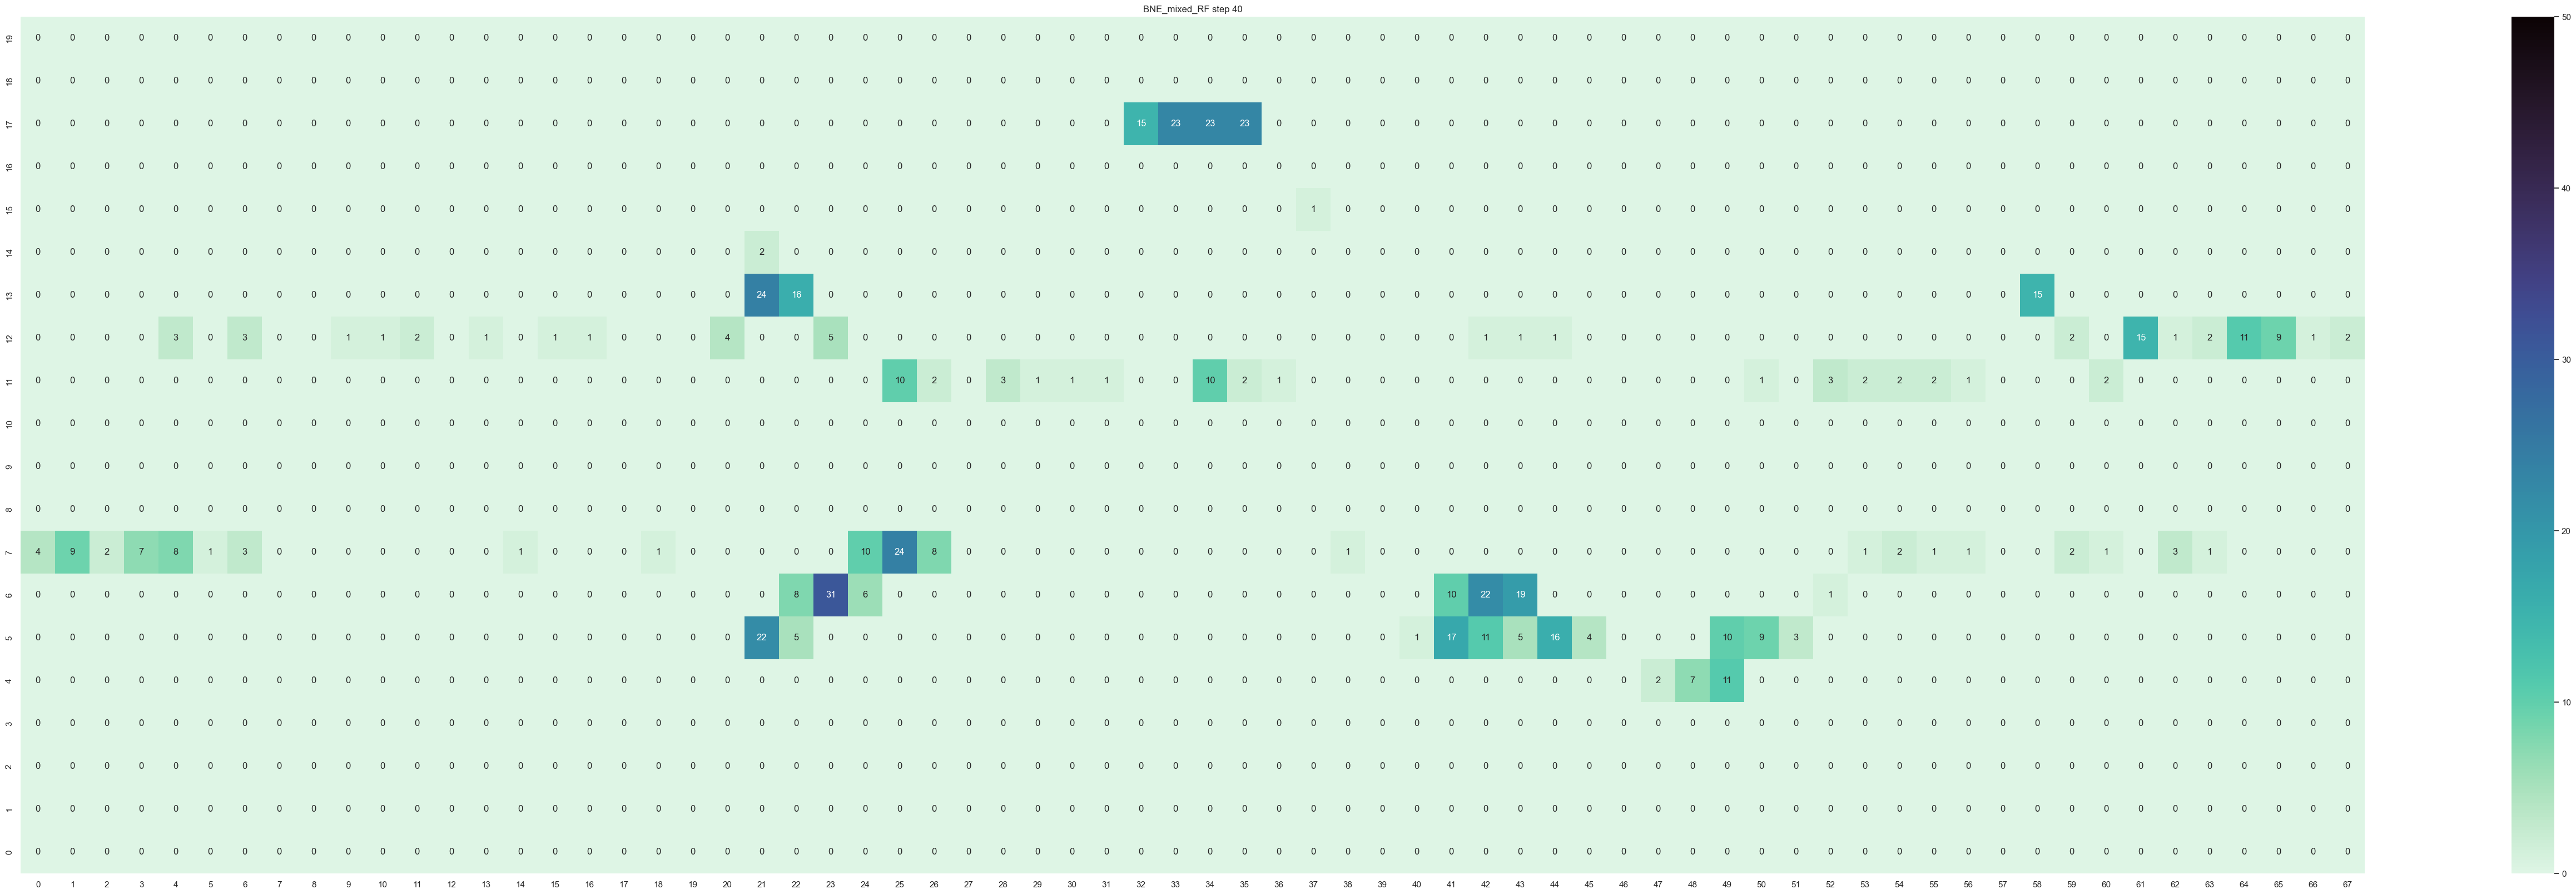

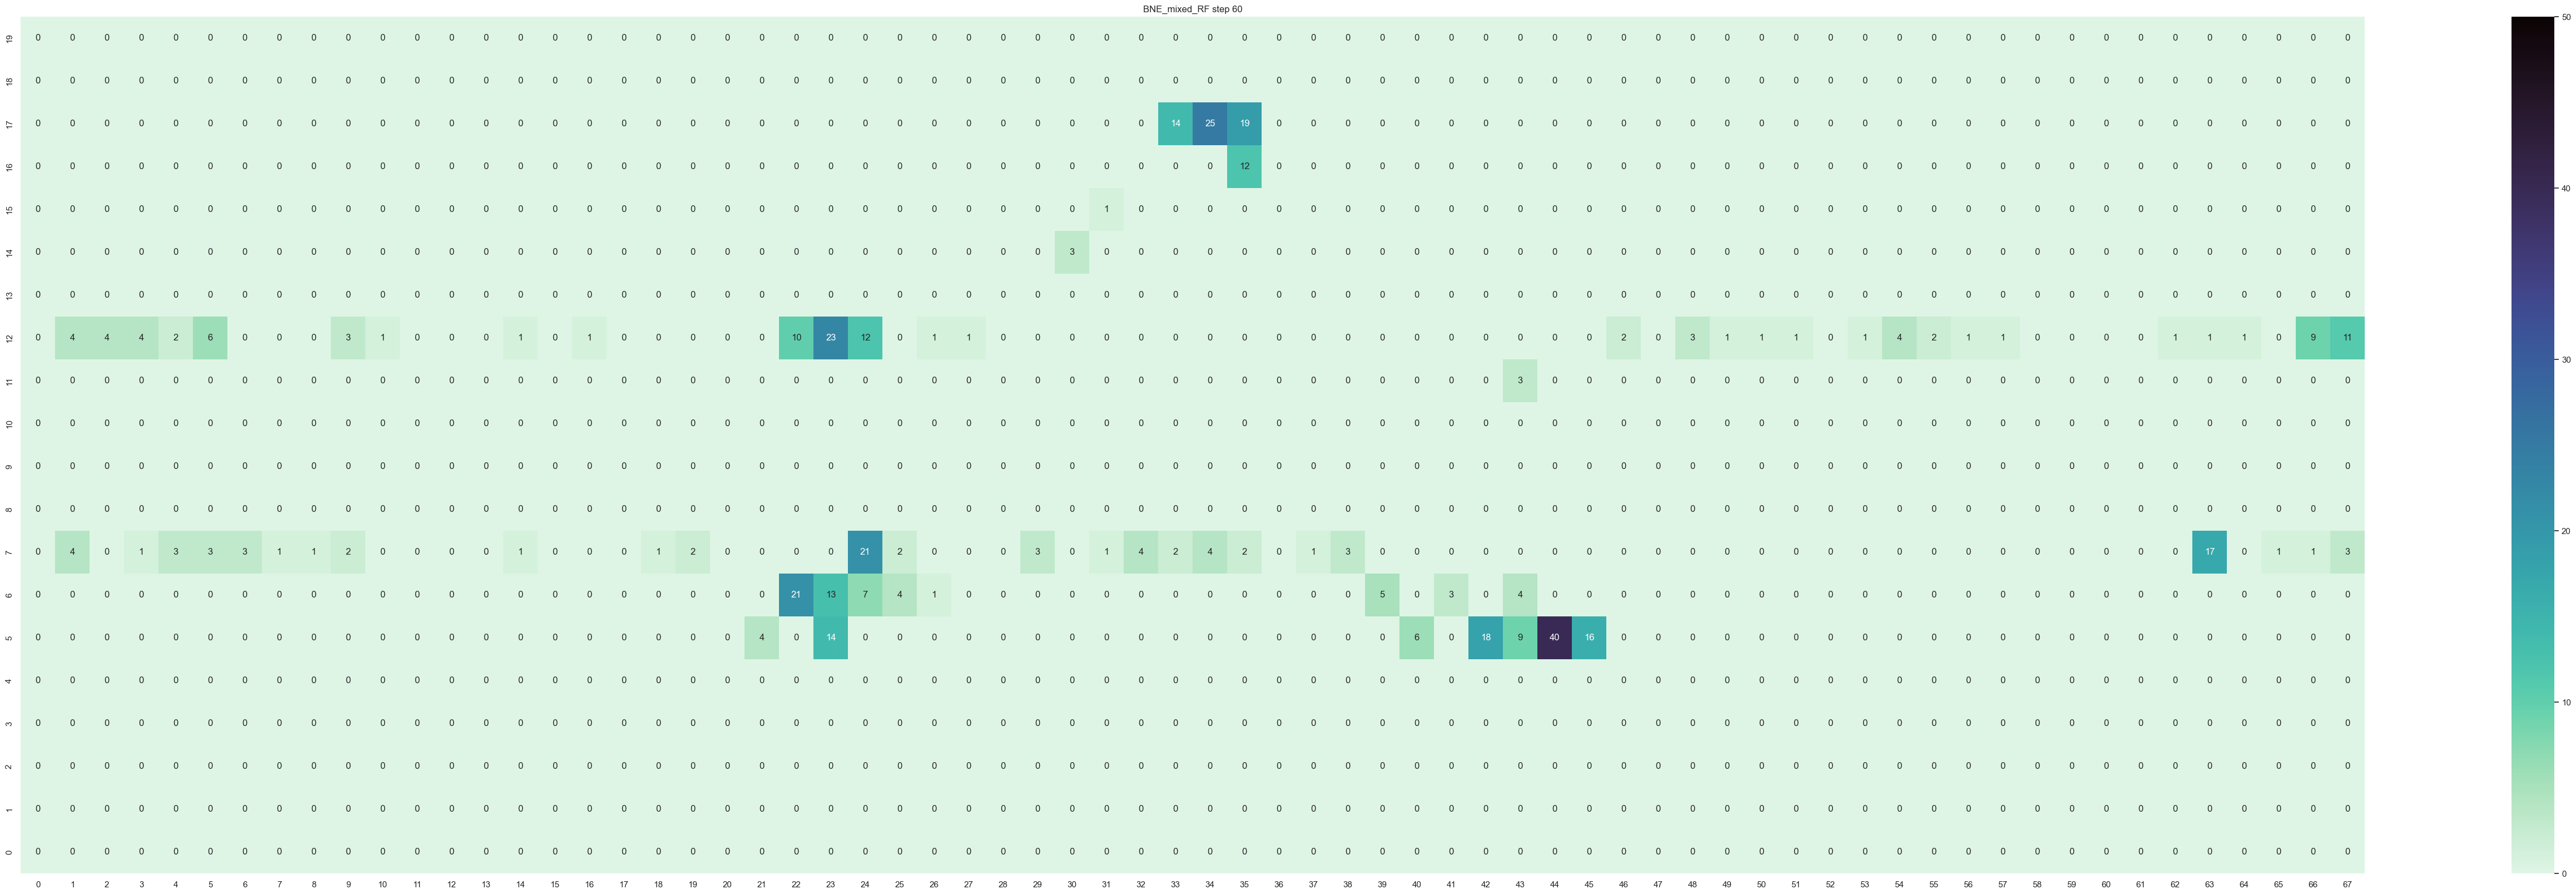

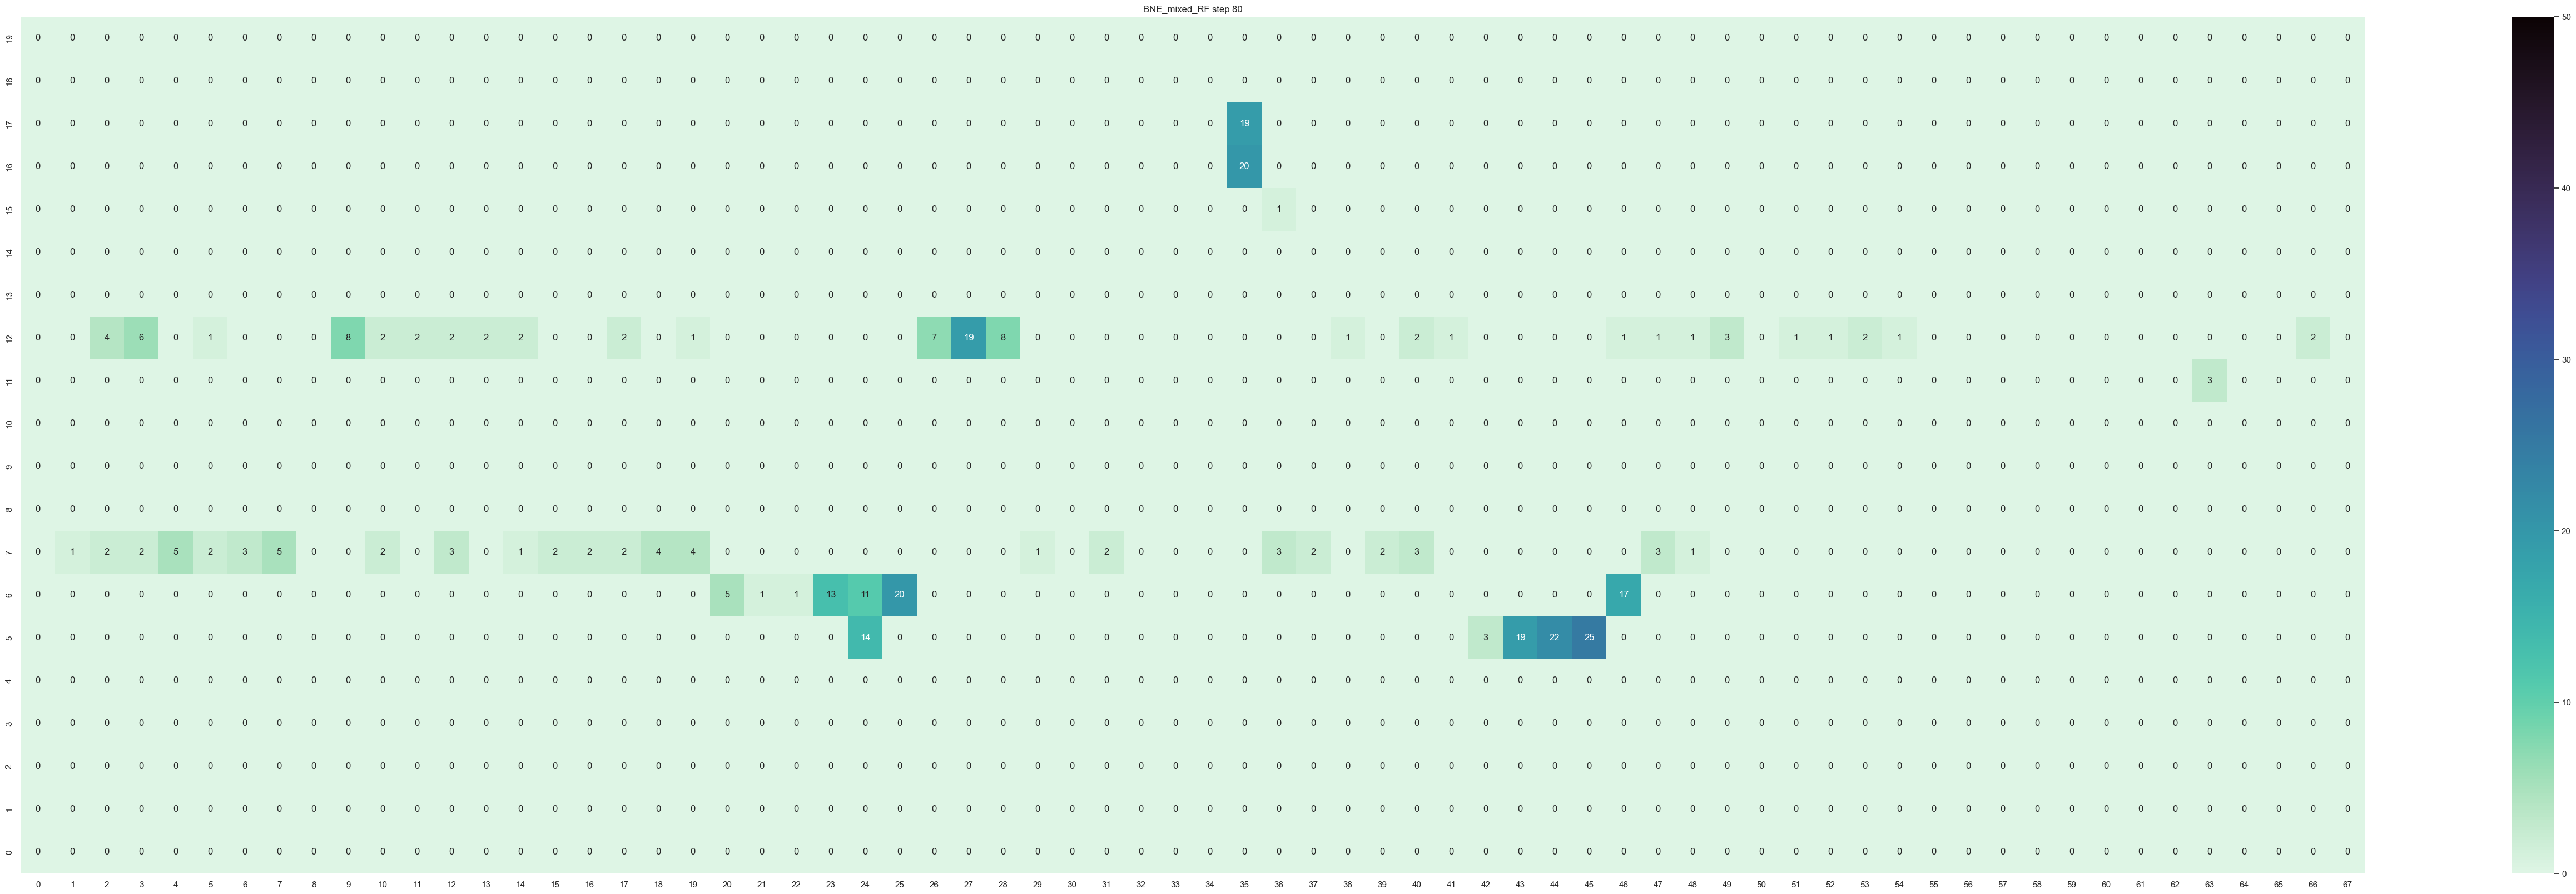

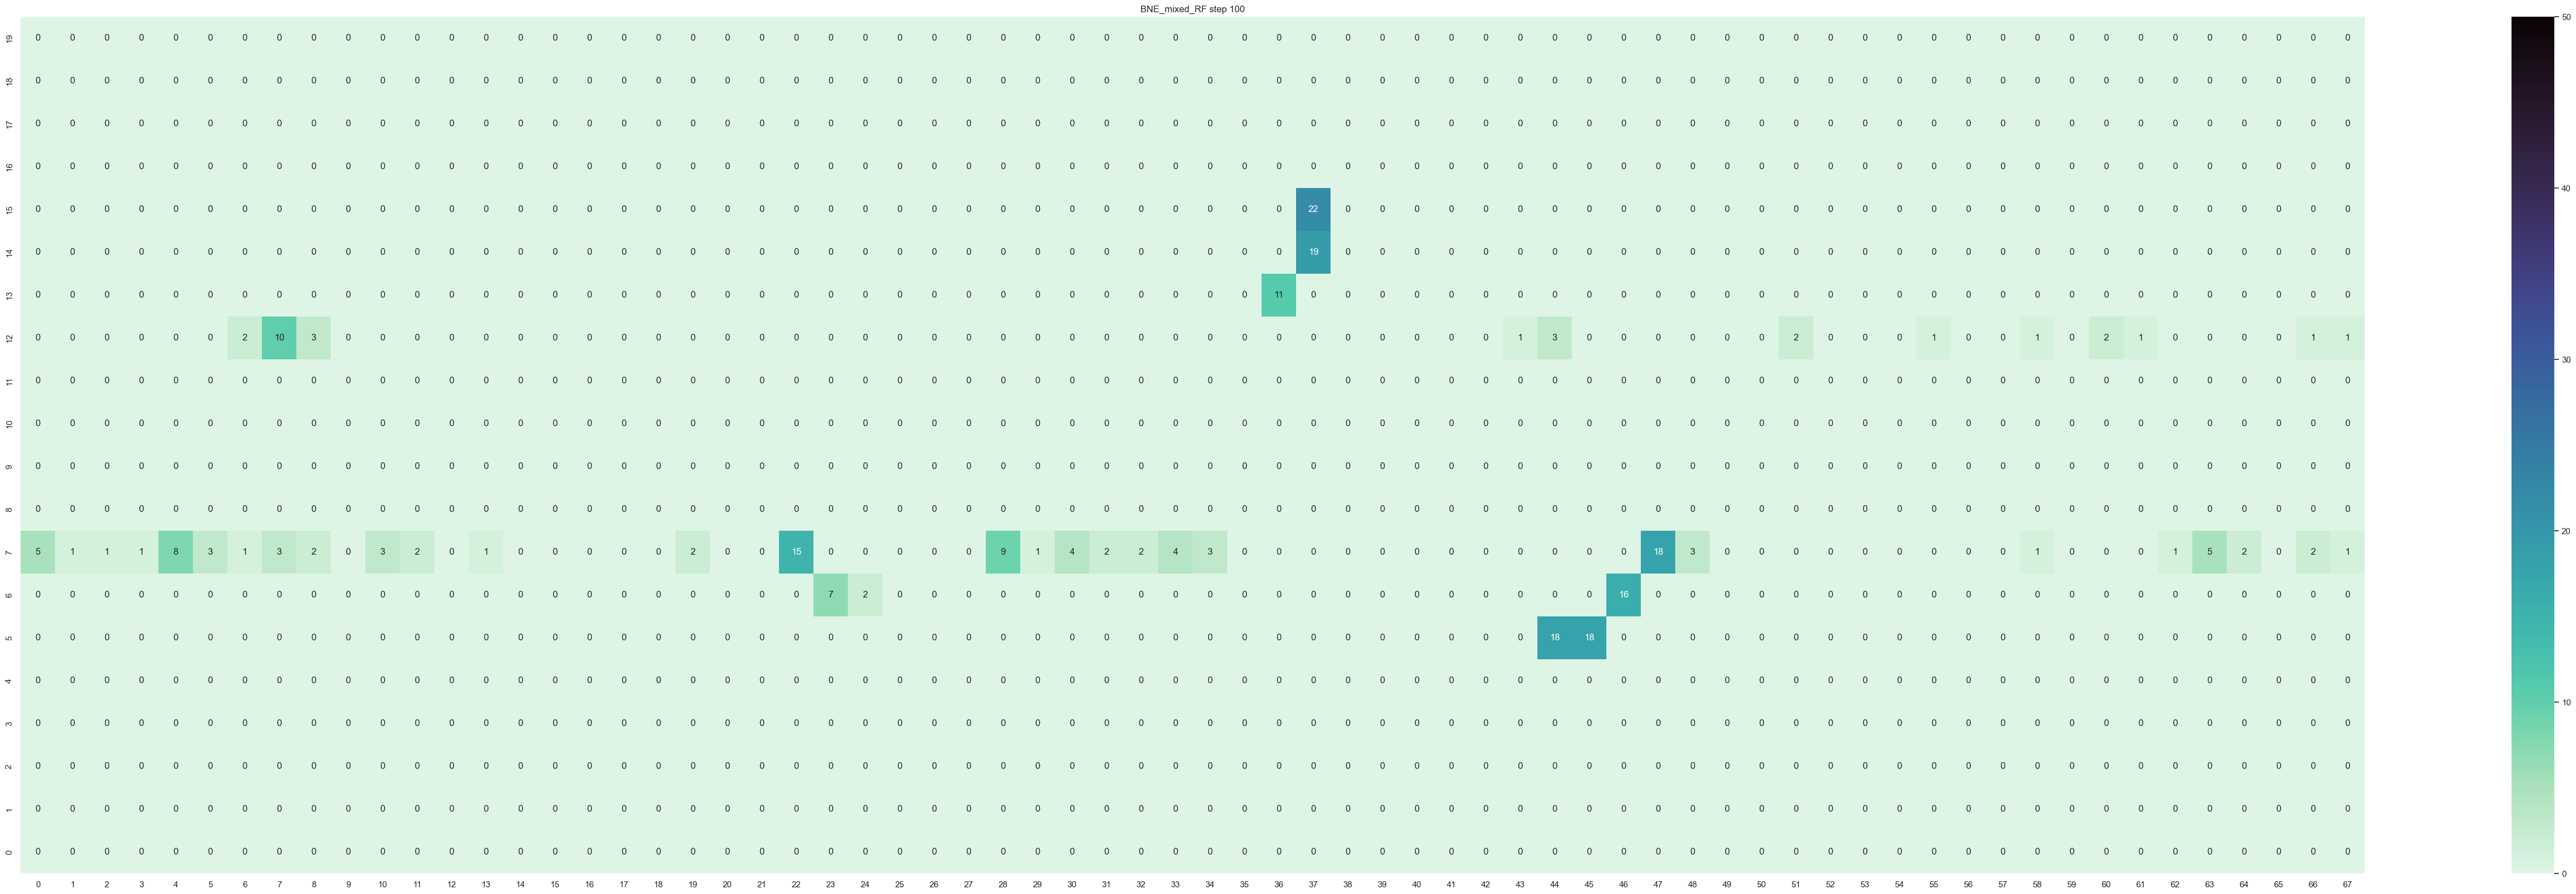

In [ ]:
frames(("BNE_mixed_RF", 0))